In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
seed(2022)

# Test function

In [ ]:
import project1; import importlib; importlib.reload(project1); from project1.project1 import make_design_matrix
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
X = make_design_matrix(xvec, p=3)

In [ ]:
from itertools import combinations_with_replacement
N=5
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec  = np.array([x, y])
xi = {"x%i"%i : xvec[i].ravel() for i in range(len(xvec))}
keys = [key for key in xi.keys()]
comb = []
p = 2
for p in range(1,p+1):
    comb += [x for x in combinations_with_replacement(keys, p )]
print(comb)
X = make_design_matrix(xvec, p=2)
print(X)

In [ ]:
def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X

x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
X_lecturer = create_X(x = x, y = y, n = 2)
np.sum(X_lecturer == X) == len(X.ravel())

In [ ]:
print(X_lecturer)
X_lecturer[:,1:]

In [ ]:
X_lecturer.shape

In [ ]:
np.mean(X_lecturer, axis=1).shape

In [ ]:
X_lecturer[:,1] - np.mean(X_lecturer[:,1])

# Time for generating design matrices

In [ ]:
import time
model_complexity = 5
xvec = np.array([x,y])
for p in range(1,model_complexity+1):

    tik = time.time()
    X = make_design_matrix(xvec = xvec, p = p)
    #X = create_X(x = x1, y=y1, n = p)
    tok = time.time()
    print(tok-tik)

In [ ]:
import time
model_complexity = 5
xvec = np.array([x,y])
for p in range(1,model_complexity+1):
    tik = time.time()
    #X = make_design_matrix(xvec = xvec, p = p)
    X = create_X(x = x, y=y, n = p)
    tok = time.time()
    print(tok-tik)

# Simple 1D test case

In [ ]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
def test_func(**kwargs):
    x = kwargs['x0']
    return 5*x**2 + x

xvec  = np.array([x])
X = make_design_matrix(xvec = xvec, p = 5)
z = test_func(**{'x0':x})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = np.array([[x] for x in znoisy - np.mean(znoisy)])
A = np.linalg.pinv(X.T@X)@X.T
betahat = A@znoisy_centered
znoisy_tilde = X@betahat
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)

In [ ]:
#%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x = np.arange(0,1,0.05)
xvec = np.array([x])
z = test_func(**{'x0':x})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = znoisy - np.mean(znoisy)
X = make_design_matrix(xvec = xvec, p = 5)
znoisy_tilde, betahat = ols_fp_wo_split(X = X, y = znoisy_centered)
plt.plot(x, znoisy_centered, linestyle = 'dashed')
plt.plot(x, znoisy_tilde)


In [ ]:
%matplotlib inline
import project1.project1;import importlib; importlib.reload(project1.project1);from project1.project1 import *
x, y = np.arange(0,1,0.1), np.arange(0,1,0.1)
x, y = np.meshgrid(x,y)
def test_func_2(**kwargs):
    x = kwargs['x0']
    y = kwargs['x1']
    return 5*x**2 + x + 5*y**2 + y + np.exp(-x**2) +np.exp(-x*y) + np.exp(-y) 
xvec = np.array([x, y])
X = make_design_matrix(xvec = xvec, p = 5)
z = test_func_2(**{'x%i'%i: xvec[i] for i in range(len(xvec))})

noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
znoisy_centered = znoisy - np.mean(znoisy)
znoisy_tilde, betahat = ols_fp_wo_split(X = X, y = znoisy_centered.ravel())
znoisy_tilde = znoisy_tilde.reshape(x.shape)
znoisy = znoisy.reshape(x.shape)


fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde + np.mean(znoisy), cmap=cm.viridis)
ax.plot_surface(x,y,z, cmap=cm.coolwarm)

# b)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


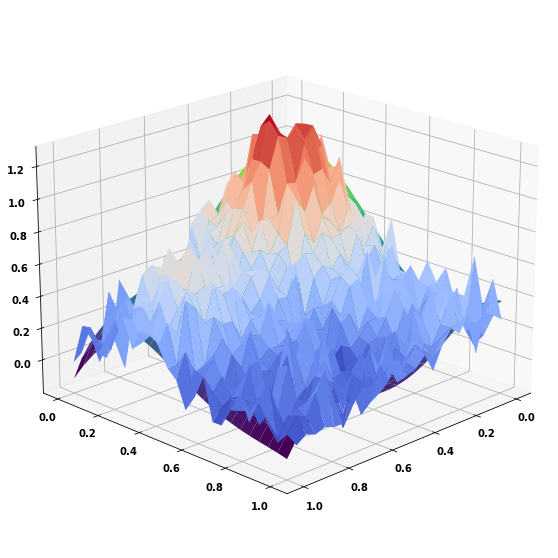

In [345]:
%matplotlib inline
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
N = 25
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec = np.array([x,y])
z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
noise = np.random.normal(0,.1,size=z.shape)
znoisy = z + noise
znoisy_centered = znoisy - np.mean(znoisy)
for p in range(1,5):
    X = make_design_matrix(xvec = xvec, p = p)
    znoisy_tilde, betahat = ols_fp_wo_split(X = X, y = znoisy_centered.ravel())
znoisy_tilde = (znoisy_tilde + np.mean(znoisy)).reshape(x.shape)

fig, ax = plt.subplots(subplot_kw={'projection':'3d'}, figsize=(10,10))
ax.plot_surface(x,y,znoisy_tilde, cmap=cm.viridis)
ax.plot_surface(x,y,znoisy, cmap=cm.coolwarm)
ax.view_init(20,45)

1
2
3
4
5
6
7
8
9
10


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10


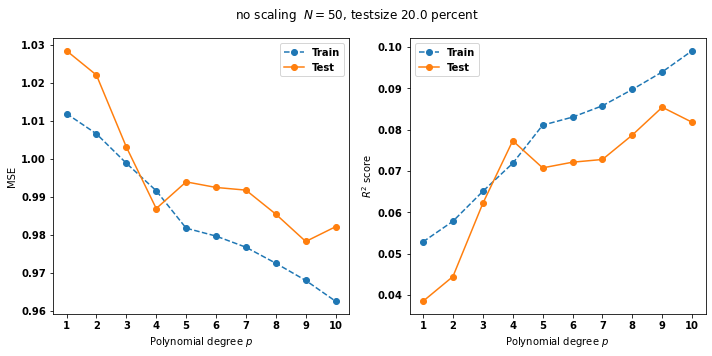

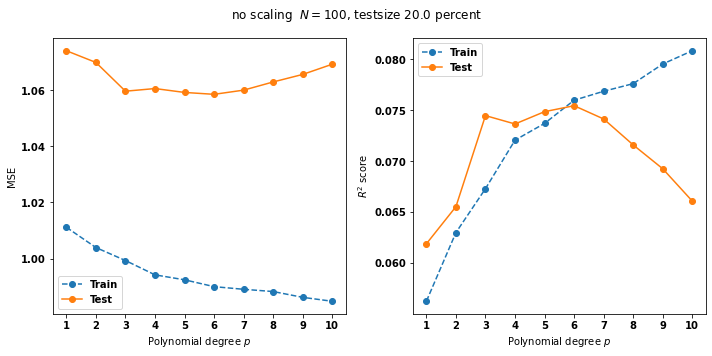

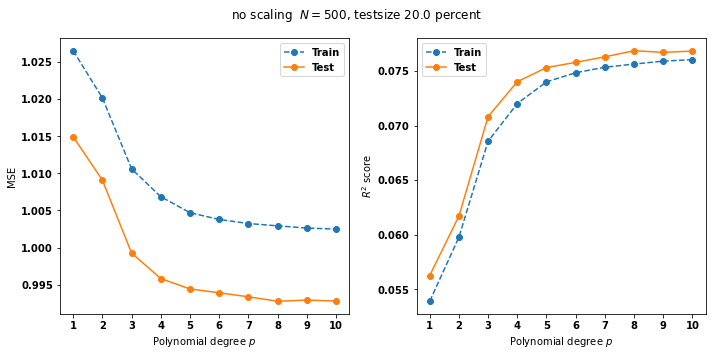

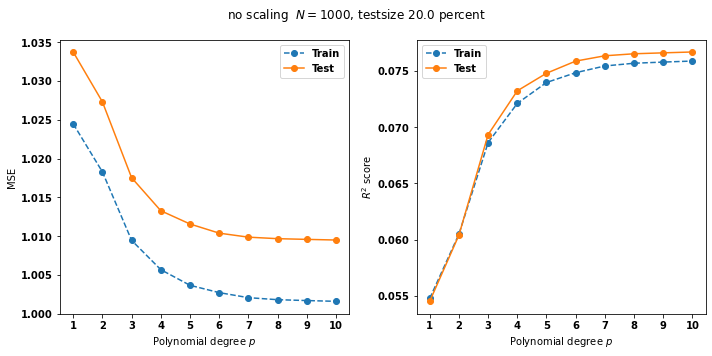

In [346]:
%matplotlib inline
import os
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
from sklearn.preprocessing import MinMaxScaler, Normalizer, RobustScaler
test_size = 0.2
scale = False
plot_betas = False
maxdeg = 10
        
for scaler in ["no_scale"]:#['standard', 'minmax', 'normalizer', 'robust']:
    for N in [50,100, 500, 1000]:
        x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
        xvec = np.array([x,y])
        
        mses_train = np.zeros((maxdeg))
        mses_test = np.zeros((maxdeg))
        Rs_train = np.zeros((maxdeg))
        Rs_test = np.zeros((maxdeg))

        betas = []
        z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
        noise = np.random.normal(0,1,size=z.shape)
        znoisy = z + noise
        for p in range(1,maxdeg+1):
            print(p)
            #X = make_design_matrix(xvec = xvec, p = p)
            X = create_X(x = xvec[0].ravel(), y = xvec[1].ravel(), n = p)

            Xtrain, Xtest, znoisy_train, znoisy_test = train_test_split(X, znoisy.ravel(), 
                                                                        **{'random_state' : 3155, 'test_size':test_size})
            if scale:
                if scaler == "standard":
                    Xtest = (Xtest[:,1:] - np.mean(Xtrain[:,1:],axis=0))/np.std(Xtrain[:,1:],axis=0)
                    Xtrain = scale_center_X(X  = Xtrain[:,1:])
                if scaler == "minmax":
                    SL_scaler = MinMaxScaler()
                    SL_scaler.fit(Xtrain)
                    Xtrain = SL_scaler.transform(Xtrain)
                    Xtest = SL_scaler.transform(Xtest)
                if scaler == "normalizer":
                    SL_scaler = Normalizer()
                    SL_scaler.fit(Xtrain)
                    Xtrain = SL_scaler.transform(Xtrain)
                    Xtest = SL_scaler.transform(Xtest)
                if scaler == "robust":
                    SL_scaler = RobustScaler()
                    SL_scaler.fit(Xtrain)
                    Xtrain = SL_scaler.transform(Xtrain)
                    Xtest = SL_scaler.transform(Xtest)
            if not scale:
                scaler = "no scaling "
            ztilde_train, betahat = ols_fp_wo_split(X = Xtrain, y = znoisy_train)
            ztilde_train = ztilde_train
            ztilde_test =  Xtest@betahat
            betas.append(betahat)

            mses_train[p-1] = MSE(y = znoisy_train,ytilde = ztilde_train)
            mses_test[p-1] = MSE(y = znoisy_test,ytilde = ztilde_test )
            Rs_train[p-1] = Rscore(y = znoisy_train, ytilde = ztilde_train)
            Rs_test[p-1] = Rscore(y = znoisy_test, ytilde = ztilde_test)
        if plot_betas:
            beta_matrix = np.ones((maxdeg, len(betas[-1])))*np.nan
            fig_betas, ax_betas = plt.subplots(figsize=(10,10))
            for i in range(maxdeg):
                for j in range(len(betas[i])):
                    beta_matrix[i,j] = betas[i][j]
            [ax_betas.plot(np.arange(maxdeg) + 1, beta_matrix[:,i], label="$\\beta%i$"%i) for i in range(beta_matrix.shape[-1])]
            ax_betas.set_ylabel("$\\beta$")
            ax_betas.set_xlabel("Polynomial degree $p$")
            ax_betas.legend(ncol = 2, bbox_to_anchor=(1,.5,.15,.5))
            ax_betas.set_xticks(np.arange(maxdeg) + 1,np.arange(maxdeg) + 1)

        fig, axs = plt.subplots(1,2, figsize=(10,5))
        polydeg = np.arange(maxdeg)+1
        fig.suptitle("%s $N=%i$, testsize $%.1f$ percent"%(scaler,N, test_size*100))
        axs[0].plot(polydeg, mses_train, ls="--", marker='o', label="Train")
        axs[0].plot(polydeg, mses_test, marker='o', label="Test")
        axs[0].set_ylabel("MSE")
        axs[1].plot(polydeg, Rs_train, marker='o', ls = "--", label = "Train")
        axs[1].plot(polydeg, Rs_test, marker='o', label = "Test")

        axs[1].set_ylabel("$R^2$ score")
        [ax.set_xlabel("Polynomial degree $p$") for ax in axs]
        [ax.set_xticks(polydeg, polydeg) for ax in axs]
        [ax.legend() for ax in axs]
        fig.tight_layout()
        fig.savefig(os.getcwd() + "/figs/partB/%s_N%i_OLS_franke_testsize_%i.png"%(scaler, N,int(test_size*100)), dpi=150)

In [347]:
from sklearn.metrics import r2_score
r2_own = Rscore(y = znoisy_test, ytilde = ztilde_test)
r2_SL = r2_score(y_true=znoisy_test, y_pred=ztilde_test)
print(r2_own == r2_SL)

True


([<matplotlib.axis.XTick at 0x7ff2a35565e0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

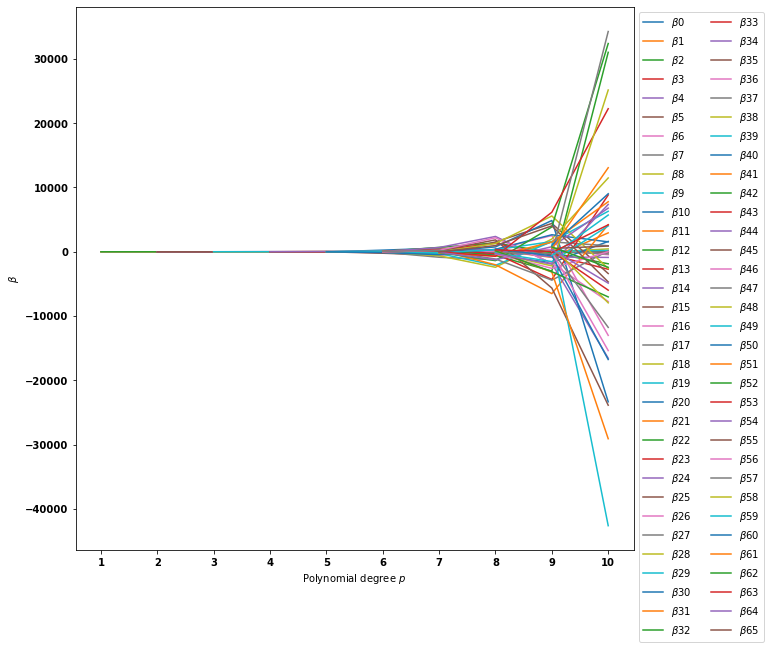

In [348]:
%matplotlib inline
beta_matrix = np.ones((maxdeg, len(betas[-1])))*np.nan
plt.figure(figsize=(10,10))
for i in range(maxdeg):
    for j in range(len(betas[i])):
        beta_matrix[i,j] = betas[i][j]
[plt.plot(np.arange(maxdeg) + 1, beta_matrix[:,i], label="$\\beta%i$"%i) for i in range(beta_matrix.shape[-1])]
plt.ylabel("$\\beta$")
plt.xlabel("Polynomial degree $p$")
plt.legend(ncol = 2, bbox_to_anchor=(1,.5,.15,.5))
plt.xticks(np.arange(maxdeg) + 1,np.arange(maxdeg) + 1)

# c) Bias-variance trade-off and bootstrapping resampling

# Bias-variance trade-off

### 1D test case


In [161]:
def test_func_exp(**kwargs):
    x = kwargs['x0']
    return np.exp(x -x**2) + 5*x**2 + x

([<matplotlib.axis.XTick at 0x7ff2cb9ae4c0>,
 [Text(1, 0, '1'),
  Text(3, 0, '3'),
  Text(5, 0, '5'),
  Text(7, 0, '7'),
  Text(9, 0, '9'),
  Text(11, 0, '11'),
  Text(13, 0, '13'),
  Text(15, 0, '15'),
  Text(17, 0, '17'),
  Text(19, 0, '19')])

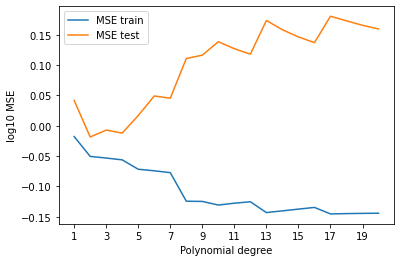

In [162]:
import numpy as np
np.random.seed(2022)
import importlib; import project1; importlib.reload(project1)
from project1.project1 import *
model_complexity = 20
mses_train, Rs_train = np.zeros((model_complexity)), np.zeros((model_complexity))
bias_train, var_train = np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test = np.zeros((model_complexity)), np.zeros((model_complexity))
bias_test, var_test = np.zeros((model_complexity)), np.zeros((model_complexity))
N = 100
x = np.linspace(0,1,N)
xvec = np.array([x])
z = test_func_exp(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.3, 
                                                                                                "random_state" : 42})
    mses_train[p-1] = MSE(y = ztrain,ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain, ytilde = ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest,ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest, ytilde = ztilde_test)
    
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.legend()
plt.ylabel("log10 MSE")
plt.xlabel("Polynomial degree")
plt.xticks(np.arange(model_complexity)[::2]+1,np.arange(20)[::2]+1)

## 2D Test case

([<matplotlib.axis.XTick at 0x7ff2cb928160>,
 [Text(1, 0, '1'),
  Text(3, 0, '3'),
  Text(5, 0, '5'),
  Text(7, 0, '7'),
  Text(9, 0, '9')])

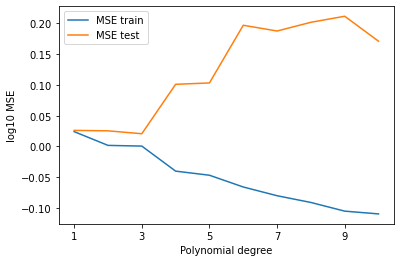

In [163]:
def test_func_2(**kwargs):
    x = kwargs['x0']
    y = kwargs['x1']
    return np.exp(x -(x+y)**2) + 5*x**2 + x*y

model_complexity = 10
mses_train, Rs_train = np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, Rs_test = np.zeros((model_complexity)), np.zeros((model_complexity))
x, y = np.meshgrid(np.arange(0,1,0.05),np.arange(0,1,0.05))
xvec = np.array([x,y])
z = test_func_2(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,1,size=z.shape)
znoisy = z + noise
for p in range(1,model_complexity+1):
    X = make_design_matrix(xvec = xvec, p = p)
    
    ztilde_train, ztilde_test, betahat, Xtrain, Xtest, ztrain,ztest = ols_fp_train_test_split(X = X, y = znoisy, 
                                                                                              **{"test_size" : 0.3, 
                                                                                                "random_state" : 42})
    mses_train[p-1] = MSE(y = ztrain,ytilde = ztilde_train)
    Rs_train[p-1] = Rscore(y = ztrain, ytilde = ztilde_train)
    
    mses_test[p-1] = MSE(y = ztest,ytilde = ztilde_test)
    Rs_test[p-1] = Rscore(y = ztest, ytilde = ztilde_test)
# plot log10(MSE) wrt to the polynomial degree
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.legend()
plt.ylabel("log10 MSE")
plt.xlabel("Polynomial degree")
plt.xticks(np.arange(model_complexity)[::2]+1,np.arange(model_complexity)[::2]+1)

# Bias-variance trade-off Franke function

# Bootstrap

### Lecturers example of bias-variance trade-off

Polynomial degree: 0
Error: 0.3214960170351912
Bias^2: 0.3123314713548606
Var: 0.009164545680330614
0.3214960170351912 >= 0.3123314713548606 + 0.009164545680330614 = 0.3214960170351912
Polynomial degree: 1
Error: 0.08426840630693411
Bias^2: 0.07968918676726028
Var: 0.004579219539673834
0.08426840630693411 >= 0.07968918676726028 + 0.004579219539673834 = 0.08426840630693411
Polynomial degree: 2
Error: 0.10398646080125035
Bias^2: 0.10077114273548982
Var: 0.0032153180657605107
0.10398646080125035 >= 0.10077114273548982 + 0.0032153180657605107 = 0.10398646080125033
Polynomial degree: 3
Error: 0.06547790180152355
Bias^2: 0.06208238634231951
Var: 0.003395515459204093
0.06547790180152355 >= 0.06208238634231951 + 0.003395515459204093 = 0.0654779018015236
Polynomial degree: 4
Error: 0.0684451941400944
Bias^2: 0.06453579006728319
Var: 0.00390940407281122
0.0684451941400944 >= 0.06453579006728319 + 0.00390940407281122 = 0.06844519414009441
Polynomial degree: 5
Error: 0.052279218012057094
Bias^2: 0

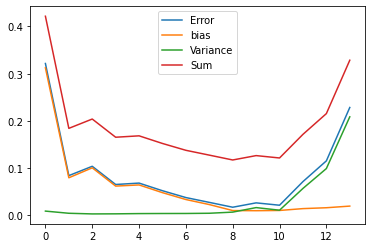

In [164]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 40
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.plot(polydegree, bias + variance + 0.1, label='Sum')

plt.legend()
plt.show()

## Franke function bias-variance trade-off with bootstrap

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


Text(0.5, 0, 'Polynomial degree')

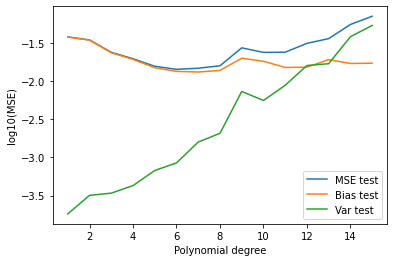

In [193]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
np.random.seed(666)
model_complexity = 15
N = 25
B = 50
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec = np.array([x,y])
mses_train, bias_train, variance_train = np.zeros((model_complexity)),np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, bias_test, variance_test = np.zeros((model_complexity)), np.zeros((model_complexity)), np.zeros((model_complexity))

z = FrankeFunction(**{'x%i'%i: xvec[i].ravel() for i in range(len(xvec))})
noise = np.random.normal(0,.1,size=z.shape)
znoisy = z + noise

for p in range(1,model_complexity+1):
    print(p)
    #X = make_design_matrix(xvec = xvec, p = p)[:,1:]
    X = make_design_matrix(xvec = xvec, p = p)
    
    Xtrain, Xtest, ztrain,ztest = train_test_split(X, znoisy,**{"test_size" : 0.2, "random_state" : 666})
    ztilde_train = np.zeros(tuple(list(ztrain.shape) + [B]))
    ztilde_test = np.zeros(tuple(list(ztest.shape) + [B]))
    for ik in range(B):
        z_resampled, X_resampled = resample(data = ztrain, design_matrix = Xtrain)
        ztilde_train[:,ik], betahat = ols_fp_wo_split(X=X_resampled, 
                                                      y=z_resampled)
        ztilde_train[:,ik] = Xtrain@betahat
        ztilde_test[:,ik] = Xtest@betahat
        
    mses_train[p-1] = np.mean(np.mean((ztrain[:,np.newaxis] - ztilde_train)**2, axis = 1))
    variance_train[p-1] = np.mean(np.var(ztilde_train, axis = 1))

    mses_test[p-1] = np.mean(np.mean((ztest[:,np.newaxis] - ztilde_test)**2, axis = 1))
    variance_test[p-1] = np.mean(np.var(ztilde_test, axis=1))
        
    bias_train[p-1] = np.mean((ztrain - np.mean(ztilde_train,axis=1))**2)
    bias_test[p-1] = np.mean((ztest - np.mean(ztilde_test,axis=1))**2)
    
        
# plot log10(MSE) wrt polynomial degrees
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.plot(ps, np.log10(bias_test), label="Bias test")
plt.plot(ps, np.log10(variance_test), label="Var test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

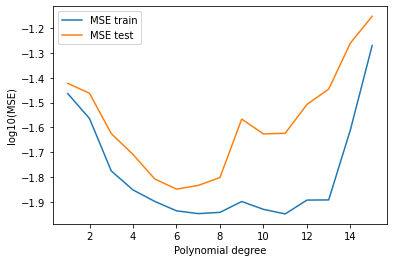

In [195]:
# plot log10(MSE) wrt polynomial degrees
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")
plt.savefig(os.getcwd() + "/figs/partD/mse_train_test_bootstrap_B%i_N%i.png"%(B,N), dpi=150)

# d) cross validation

## Franke function

### SL

Text(0.5, 0, 'Polynomial degree')

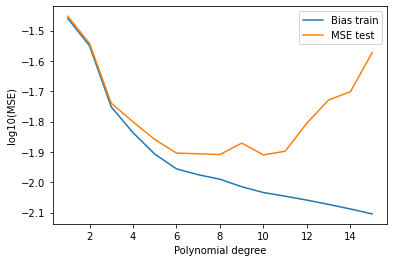

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
np.random.seed(2018)
# perform the kfolding
k = 5
kfold_SL = KFold(n_splits=k, shuffle=True)
mses_train, var_train, bias_train = np.zeros((model_complexity, k)), np.zeros((model_complexity, k)), np.zeros((model_complexity, k))
mses_test, var_test, bias_test = np.zeros((model_complexity, k)), np.zeros((model_complexity, k)),np.zeros((model_complexity, k))
ols = linear_model.LinearRegression(fit_intercept=False)
for p in range(1,model_complexity+1):
    X = create_X(x=x.ravel(), y=y.ravel(), n = p)
    lens = [len([x for x in kfold_SL.split(X)][i][1]) for i in range(5)]
    ztest, ztrain = np.zeros((max(lens),k)), np.zeros((max(lens)*(k-1),k))
    ztilde_test, ztilde_train = np.zeros((max(lens),k)), np.zeros((max(lens)*(k-1),k))
    i=0
    for train_inds,test_inds in kfold_SL.split(X):
        Xtrain,ztrain[:len(train_inds),i] = X[train_inds],znoisy.ravel()[train_inds]
        Xtest, ztest[:len(test_inds),i] = X[test_inds], znoisy.ravel()[test_inds]
        ols.fit(Xtrain,ztrain[:len(train_inds),i])
        ztilde_train[:len(train_inds),i] = ols.predict(Xtrain)
        ztilde_test[:len(test_inds),i] = ols.predict(Xtest)
        i+=1        
    mses_train[p-1] = np.mean((ztrain - ztilde_train)**2)
    mses_test[p-1] = np.mean((ztest - ztilde_test)**2)
    bias_train[p-1] = np.mean((ztrain - np.mean(ztilde_train, axis=1, keepdims=True))**2)
    bias_test[p-1] = np.mean((ztest - np.mean(ztilde_test, axis=1,keepdims=True))**2)
    var_train[p-1] = np.mean((ztilde_train - np.mean(ztilde_train, axis = 1, keepdims=True))**2)
    var_test[p-1] = np.mean((ztilde_test - np.mean(ztilde_test, axis = 1, keepdims=True))**2)

# plot results
ps = [i for i in range(1,model_complexity+1)]
plt.figure()
plt.plot(ps, np.log10(np.mean(mses_train, axis=1)), label="Bias train")
plt.plot(ps, np.log10(np.mean(mses_test, axis=1)), label="MSE test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

### Own implentation

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


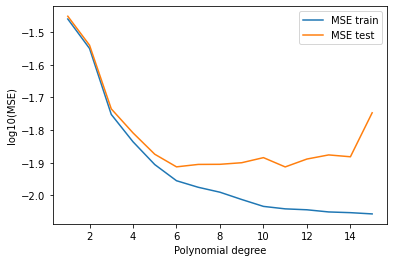

In [190]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
np.random.seed(2018)
# perform the kfolding
k = 5
mses_train, var_train, bias_train = np.zeros((model_complexity)), np.zeros((model_complexity)), np.zeros((model_complexity))
mses_test, var_test, bias_test = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity))
for p in range(1,model_complexity+1):
    print(p)
    splits = kfold(data=znoisy, k=k)
    ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = znoisy, 
                                                                splits = splits, 
                                                                xvec = np.array([x, y]), 
                                                                k = k, p = p, 
                                                                method = "ols")

    mses_train[p-1] = np.nanmean((ztrain - ztilde_train)**2)
    mses_test[p-1] = np.nanmean((ztest - ztilde_test)**2)
    
ps = [i for i in range(1,model_complexity+1)]
plt.figure()
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")
plt.savefig(os.getcwd() + "/figs/partD/mse_train_test_CV_k%i_N%i.png"%(k,N), dpi=150)

# e) Ridge with CV and bootstrap
- Bias-variance trade-off
- MSE and R2-score
- study dependence on $\lambda$

### Ridge comparison $\lambda = 0$
- should give similar features as the OLS
    - but bias is tending to increase with the polynomial degree...

Text(0.5, 0, 'Polynomial degree')

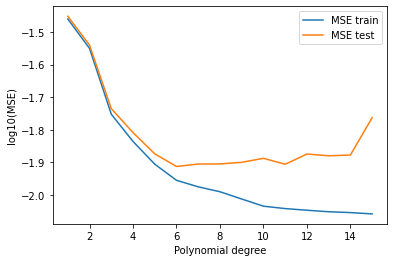

In [192]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
np.random.seed(2018)

mses_train, var_train, bias_train = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity))
mses_test, var_test, bias_test = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity))
for p in range(1,model_complexity+1):
    ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = znoisy, 
                                                                splits = splits, # using same splits as with OLS CV
                                                                xvec = np.array([x, y]), 
                                                                k = k, p = p, 
                                                                method = "ridge", 
                                                                lmbda = 0)
    mses_train[p-1] = np.nanmean(np.nanmean((ztrain - ztilde_train)**2, axis = 1))
    mses_test[p-1] = np.nanmean(np.nanmean((ztest - ztilde_test)**2, axis = 1))
# plot log10(MSE) wrt polynomial degree
ps = [i for i in range(1,model_complexity+1)]
plt.plot(ps, np.log10(mses_train), label="MSE train")
plt.plot(ps, np.log10(mses_test), label="MSE test")
plt.legend()
plt.ylabel("log10(MSE)")
plt.xlabel("Polynomial degree")

## CV
- check: for $\lambda = 0$ do I get the same as the OLS

## Simple test case

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *

# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

# Generate the data.
nsamples = 50
x = np.random.randn(nsamples)
y = 3*x**2 + np.random.randn(nsamples)
p = 6
X = make_design_matrix(xvec=np.array([x]), p=p)
k = 5
# Decide which values of lambda to use
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)
mses_train, var_train, bias_train = np.zeros((len(lambdas))), np.zeros((len(lambdas))),np.zeros((len(lambdas)))
mses_test, var_test, bias_test = np.zeros((len(lambdas))), np.zeros((len(lambdas))),np.zeros((len(lambdas)))
splits = kfold(data=y, k=k, random_state = 3155)
for i in range(len(lambdas)):
    zpred = np.zeros(tuple(list(splits[ik].shape)+[k]))
    ztest = np.zeros(tuple(list(splits[ik].shape)+[k]))
    zpred_train = np.zeros((max([len(x) for x in splits])*(k-1),k))
    ztrain = np.zeros((max([len(x) for x in splits])*(k-1),k))
    
    for ik in range(k):
        indtest = splits[ik]
        indtrain = np.concatenate(np.delete(splits, ik, axis=0))
        ztrain[:,ik], Xtrain = y.ravel()[indtrain], X[indtrain]
        ztest[:,ik], Xtest = y.ravel()[indtest], X[indtest]
        meanXtrain = np.mean(Xtrain, axis = 0)
        stdXtrain = np.std(Xtrain, axis = 0)
        stdXtrain[0] = 1
        Xtrain_c = (Xtrain - meanXtrain)/stdXtrain
        Xtest_c = (Xtest - meanXtrain)/stdXtrain
        mean_ztrain = np.mean(ztrain[:,ik])
        betahat = np.linalg.pinv(Xtrain_c.T@Xtrain_c + lambdas[i]*np.eye(p+1,p+1))@Xtrain_c.T@(ztrain[:,ik]-mean_ztrain)
        zpred_train[:,ik] = Xtrain_c @ betahat + mean_ztrain
        zpred[:,ik] = Xtest_c @ betahat + mean_ztrain
    
    mses_train[i] = np.mean(np.mean((ztrain - zpred_train)**2, axis = 1))
    mses_test[i] = np.mean(np.mean((ztest - zpred)**2, axis = 1))    

In [ ]:
plt.plot(lambdas, mses_train, label="train")
plt.plot(lambdas, mses_test, label="test")
plt.xscale('log')
plt.legend()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k, random_state=3155, shuffle=True)
poly = PolynomialFeatures(degree = p)
estimated_mse_sklearn = np.zeros(nlambdas)
i = 0
for lmb in lambdas:
    # generate model
    ridge = Ridge(alpha = lmb, fit_intercept=True)
    # make design matrix
    X_SL = poly.fit_transform(x[:, np.newaxis])
    # perform cross-validation
    estimated_mse_folds = cross_val_score(ridge, X_SL_scaled, y[:, np.newaxis], 
                                          scoring='neg_mean_squared_error', cv=kfold)
    # store mse values
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)

    i += 1

In [ ]:
plt.plot(np.log10(lambdas), np.log10(mses_test), label="MSE test")
plt.plot(np.log10(lambdas), np.log10(estimated_mse_sklearn), label = 'cross_val_score')
plt.legend()

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *

# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)
mses_train, var_train, bias_train = np.zeros((len(lambdas))), np.zeros((len(lambdas))),np.zeros((len(lambdas)))
mses_test, var_test, bias_test = np.zeros((len(lambdas))), np.zeros((len(lambdas))),np.zeros((len(lambdas)))
splits = kfold(data=y, k=k, random_state = 3155)
for i in range(len(lambdas)):
    ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = y, splits = splits, 
                                                                xvec = np.array([x]), 
                                                                k = k, p = p, 
                                                                method = "ridge", 
                                                                lmbda = lambdas[i], 
                                                                scale_centering=True)#True)
    mses_train[i] = np.nanmean((ztrain - ztilde_train)**2)
    bias_train[i] = np.nanmean((ztrain - np.nanmean(ztilde_train, axis=1, keepdims=True))**2)
    var_train[i] = np.nanmean(np.var(ztilde_train, axis=1))

    mses_test[i] = np.nanmean((ztest - ztilde_test)**2)
    bias_test[i] = np.nanmean((ztest - np.mean(ztilde_test, axis=1, keepdims=True))**2)
    var_test[i] = np.nanmean(np.var(ztilde_test, axis=1))

In [ ]:
plt.plot(np.log10(lambdas), np.log10(mses_test), label="MSE test")
plt.plot(np.log10(lambdas), np.log10(estimated_mse_sklearn), label = 'cross_val_score')
plt.legend()

## Franke function

[None, None]

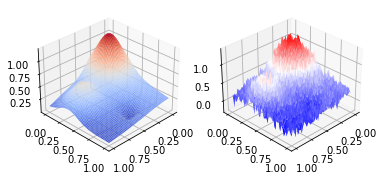

In [300]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *

np.random.seed(2018)
N = 50
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec = np.array([x,y])
z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
noise = np.random.normal(0,.1,size=z.shape)
znoisy = z + noise
fig, axs = plt.subplots(1,2,subplot_kw={'projection' : '3d'})
axs[0].plot_surface(x, y, z, cmap = plt.cm.coolwarm)
axs[1].plot_surface(x, y, znoisy, cmap = plt.cm.bwr)
[ax.view_init(30,45) for ax in axs]

## CV

In [301]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *

model_complexity = 20
k = 5

lambdas = np.logspace(-10,0,6)
ll = len(lambdas)
mses_train, bias_train, var_train = np.zeros((model_complexity, ll)),np.zeros((model_complexity, ll)),np.zeros((model_complexity, ll))
mses_test, bias_test, var_test = np.zeros((model_complexity, ll)),np.zeros((model_complexity, ll)),np.zeros((model_complexity, ll))
for p in range(1, model_complexity+1):
    print(p)
    for i in range(len(lambdas)):
        #print(lambdas[i])
        splits = kfold(data=znoisy, k=k, random_state = 3155)
        
        ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = znoisy, 
                                                                    splits = splits, 
                                                                    xvec = xvec, 
                                                                    k = k, p = p, 
                                                                    method = "ridge", 
                                                                    lmbda = lambdas[i], 
                                                                    scale_centering=False
                                                                    )
        #computing the metrics
        mses_train[p-1,i] = np.nanmean(np.nanmean((ztrain - ztilde_train)**2, axis=1))
        mses_test[p-1,i] = np.nanmean(np.nanmean((ztest - ztilde_test)**2, axis = 1))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


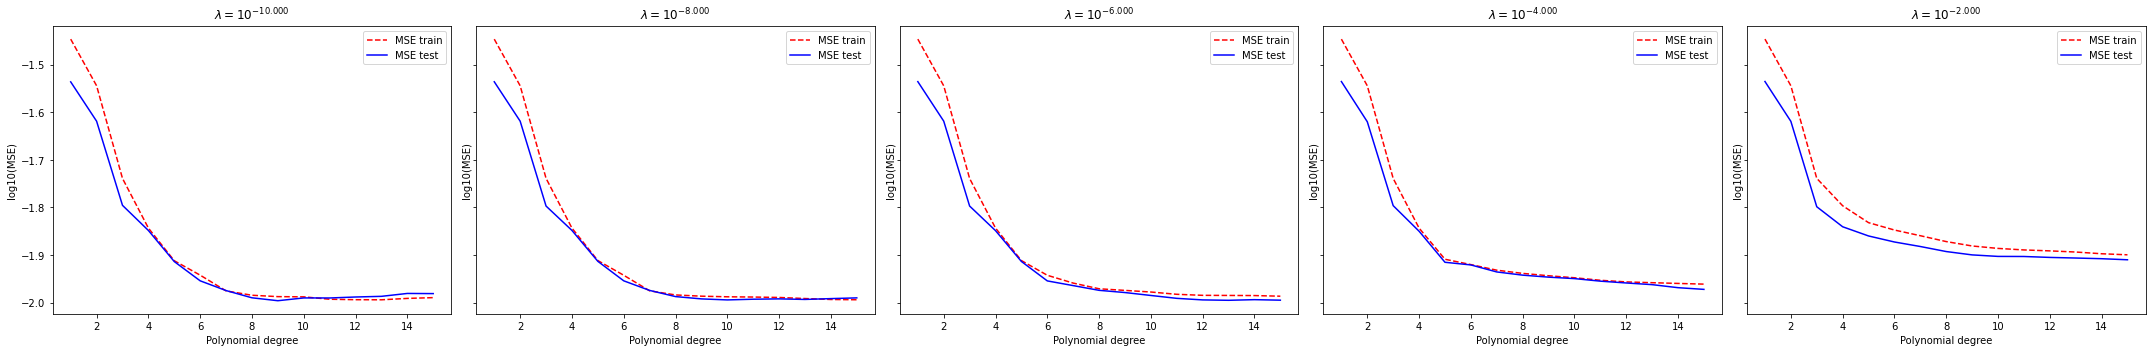

In [314]:
fig, axs = plt.subplots(1,len(lambdas)-1, figsize=(len(lambdas)*5,5),sharey=True)

ps = np.arange(model_complexity)+1

for i in range(len(lambdas)-1):
    if lambdas[i] == 0:
        axs[i].set_title("$\\lambda = 0$")
    else:    
        axs[i].set_title("$\\lambda = 10^{%.3f}$"%np.log10(lambdas[i]))
    axs[i].plot(ps, np.log10(mses_train[:,i]),  label="MSE train", color = 'r', ls='--')
    axs[i].plot(ps, np.log10(mses_test[:,i]),  label="MSE test",  color = 'b')
[ax.set_ylabel("log10(MSE)") for ax in axs]
[ax.set_xlabel("Polynomial degree") for ax in axs]
[ax.legend() for ax in axs]
fig.tight_layout()
fig.savefig(os.getcwd() + "/figs/partE/log10mse_polydeg_train_test_ridge_p%i_CV_k%i.png"%(ps[-1],k), dpi=150)

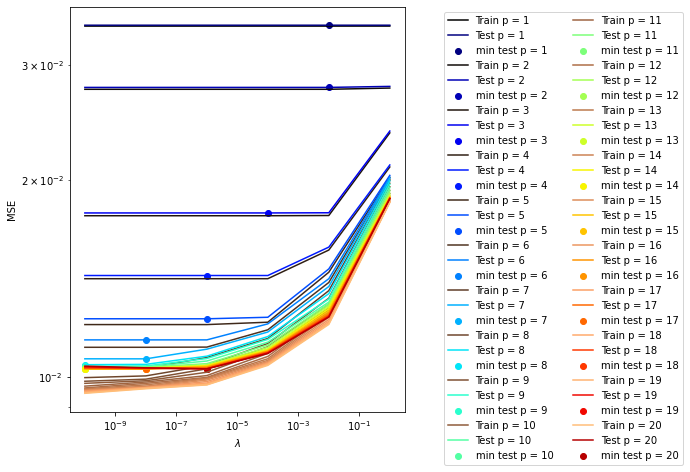

In [303]:
carr = np.arange(mses_train.shape[0])/mses_train.shape[0]
cs_train = plt.cm.copper(carr)
cs_test = plt.cm.jet(carr)
fig, ax = plt.subplots(1,1, figsize=(10,7))
for ip in range(mses_train.shape[0]):
    ax.plot(lambdas, mses_train[ip], color = cs_train[ip], label="Train p = %i"%(ip+1))
    ax.plot(lambdas, mses_test[ip], color = cs_test[ip], label="Test p = %i"%(ip+1))
    ax.scatter(lambdas[mses_test[ip] == min(mses_test[ip])], 
               min(mses_test[ip]), label="min test p = %i"%(ip+1), color = cs_test[ip])
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim(.95,1.3)
ax.set_ylabel("MSE")
ax.set_xlabel("$\\lambda$")
ax.legend(bbox_to_anchor=(1.1,.9,0,.1), ncol=2)
fig.tight_layout()
fig.savefig(os.getcwd() + "/figs/partE/log10mse_vs_lambdas_train_test_ridge_p%i_CV_k%i.png"%(ps[-1],k), dpi=150)

## with bootstrapping

### Fixed lambda sklearn

In [304]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
from sklearn import linear_model
model_complexity = 15
k = 100
lmbda = 1e-5
mses_train, var_train, bias_train = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity)) 
mses_test, var_test, bias_test = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity))

SL_ridge = linear_model.Ridge(alpha = lmbda, fit_intercept=True)
for p in range(1,model_complexity+1):
    print(p)
    X = create_X(x = xvec[0].ravel(), y = xvec[1].ravel(), n = p)
    
    Xtrain, Xtest, ztrain, ztest = train_test_split(X, znoisy.ravel(), test_size=0.2, random_state=666)
    
    ztilde_train = np.zeros(tuple(list(ztrain.shape) + [k]))
    ztilde_test = np.zeros(tuple(list(ztest.shape) + [k]))
    
    for ik in range(k):
        z_resampled, Xtrain_resampled = resample(data = ztrain, design_matrix=Xtrain)
        SL_ridge.fit(Xtrain_resampled, z_resampled)
        ztilde_train[:,ik] = SL_ridge.predict(Xtrain_resampled)
        ztilde_test[:,ik] = SL_ridge.predict(Xtest)
    
    # compute mse, bias and variances
    mses_train[p-1] = np.mean(np.mean((ztrain[:,np.newaxis] - ztilde_train)**2, axis = 1))
    bias_train[p-1] = np.mean((ztrain - np.mean(ztilde_train, axis=1))**2)
    var_train[p-1] = np.mean(np.var(ztilde_train, axis=1))

    mses_test[p-1] = np.mean(np.mean((ztest[:,np.newaxis] - ztilde_test)**2, axis = 1))
    bias_test[p-1] = np.mean((ztest - np.mean(ztilde_test, axis=1))**2)
    var_test[p-1] = np.mean(np.var(ztilde_test, axis=1))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


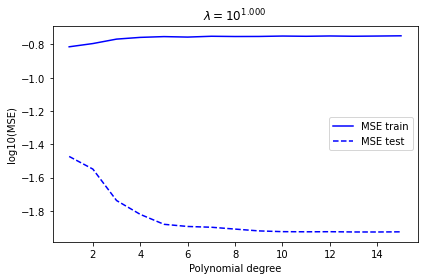

In [305]:
fig, ax = plt.subplots(sharey=True)

ps = np.arange(model_complexity)+1
ax.set_title("$\\lambda = 10^{%.3f}$"%np.log10(10))
ax.plot(ps, np.log10(mses_train),  label="MSE train",  color = 'b')
ax.plot(ps, np.log10(mses_test),  label="MSE test",  color = 'b', ls='--')
#ax.plot(ps, np.log10(bias_test),  label="Bias test", color = 'C1', ls='--')
#ax.plot(ps, np.log10(var_test),  label="Var test",  color = 'C2', ls='--')
#ax.plot(ps, np.log10(bias_test + var_test + np.var(noise)),  label="Bias + Var(model) + Var(noise)",  color = 'C4', ls='--')  
ax.set_ylabel("log10(MSE)")
ax.set_xlabel("Polynomial degree")
ax.legend()
fig.tight_layout()

### Fixed lambda own implementation

In [306]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 15
k = 100
mses_train, var_train, bias_train = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity)) 
mses_test, var_test, bias_test = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity))
for p in range(1,model_complexity+1):
    print(p)
    X = create_X(x = xvec[0].ravel(), y = xvec[1].ravel(), n = p)[:,1:]
    
    Xtrain, Xtest, ztrain, ztest = train_test_split(X, znoisy.ravel(), test_size=0.2, random_state=666)
    
    ztilde_train = np.zeros(tuple(list(ztrain.shape) + [k]))
    ztilde_test = np.zeros(tuple(list(ztest.shape) + [k]))
    
    for ik in range(k):
        z_resampled, Xtrain_resampled = resample(data = ztrain, design_matrix=Xtrain)
        meanXtrain_rs = np.mean(Xtrain_resampled, axis=0)
        ztilde_train[:,ik], betahat = ridge_fp_wo_split(X=Xtrain_resampled-meanXtrain_rs, 
                                                        y=z_resampled-np.mean(z_resampled), 
                                                        lmbda = lmbda)
        
        ztilde_test[:,ik] = (Xtest-meanXtrain_rs)@betahat + np.mean(z_resampled)
        
    # compute mse, bias and variances
    mses_train[p-1] = np.mean(np.mean((ztrain[:,np.newaxis] - ztilde_train)**2, axis = 1))
    bias_train[p-1] = np.mean((ztrain - np.mean(ztilde_train, axis=1))**2)
    var_train[p-1] = np.mean(np.var(ztilde_train, axis=1))

    mses_test[p-1] = np.mean(np.mean((ztest[:,np.newaxis] - ztilde_test)**2, axis = 1))
    bias_test[p-1] = np.mean((ztest - np.mean(ztilde_test, axis=1))**2)
    var_test[p-1] = np.mean(np.var(ztilde_test, axis=1))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


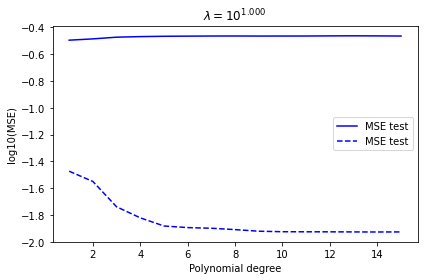

In [307]:
fig, ax = plt.subplots(sharey=True)

ps = np.arange(model_complexity)+1
ax.set_title("$\\lambda = 10^{%.3f}$"%np.log10(10))
ax.plot(ps, np.log10(mses_train),  label="MSE test",  color = 'b')
ax.plot(ps, np.log10(mses_test),  label="MSE test",  color = 'b', ls='--')

#ax.plot(ps, np.log10(bias_test[:,i]),  label="Bias test", color = 'C1', ls='--')
#ax.plot(ps, np.log10(var_test[:,i]),  label="Var test",  color = 'C2', ls='--')
#ax.plot(ps, np.log10(bias_test[:,i] + var_test[:,i] + np.var(noise)),  label="Bias + Var(model) + Var(noise)",  color = 'C4', ls='--')
    
ax.set_ylabel("log10(MSE)")
ax.set_xlabel("Polynomial degree")
ax.legend()
fig.tight_layout()

### List of lambdas

In [308]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 15
k = 100
mses_train, var_train, bias_train = np.zeros((model_complexity, ll)), np.zeros((model_complexity, ll)),np.zeros((model_complexity, ll)) 
mses_test, var_test, bias_test = np.zeros((model_complexity, ll)), np.zeros((model_complexity, ll)),np.zeros((model_complexity, ll))
betas = []
for p in range(1,model_complexity+1):
    print(p)
    X = create_X(x = xvec[0].ravel(), y = xvec[1].ravel(), n = p)[:,1:]
    
    Xtrain, Xtest, ztrain, ztest = train_test_split(X, znoisy.ravel(), test_size=0.2, random_state=2018)
    ztilde_train = np.zeros(tuple(list(ztrain.shape) + [len(lambdas),k]))
    ztilde_test = np.zeros(tuple(list(ztest.shape) + [len(lambdas),k]))
    betas_ip = np.zeros((X.shape[1],len(lambdas), k))
    for i in range(len(lambdas)):
        for ik in range(k):
            z_resampled, Xtrain_resampled = resample(data = ztrain, design_matrix=Xtrain)
            meanXtrain_rs = np.mean(Xtrain_resampled, axis = 0)
            ztilde_train[:,i,ik], betahat = ridge_fp_wo_split(#X=Xtrain_resampled,
                                                              X=Xtrain_resampled-meanXtrain_rs,
                                                              #y=z_resampled,
                                                              y=z_resampled-np.mean(z_resampled), 
                                                              lmbda = lambdas[i])
            ztilde_train[:,i,ik] = (Xtrain - meanXtrain_rs)@betahat + np.mean(z_resampled)
            #ztilde_test[:,i,ik] = Xtest@betahat
            ztilde_test[:,i,ik] = (Xtest - meanXtrain_rs)@betahat + np.mean(z_resampled)
            
            betas_ip[:,i,ik] = betahat
    betas.append(betas_ip)
    # compute mse, bias and variances
    for i in range(len(lambdas)):
        mses_train[p-1, i] = np.mean(np.mean((ztrain[:,np.newaxis] - ztilde_train[:,i])**2, axis = 1))
        bias_train[p-1, i] = np.mean((ztrain - np.mean(ztilde_train[:,i], axis=1))**2)
        var_train[p-1, i] = np.mean(np.var(ztilde_train[:,i], axis=0))

        mses_test[p-1, i] = np.mean(np.mean((ztest[:,np.newaxis] - ztilde_test[:,i])**2, axis = 1))
        bias_test[p-1, i] = np.mean((ztest - np.mean(ztilde_test[:,i], axis=1))**2)
        var_test[p-1, i] = np.mean(np.var(ztilde_test[:,i], axis=0))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


## Check the data with a 3d plot

[None, None]

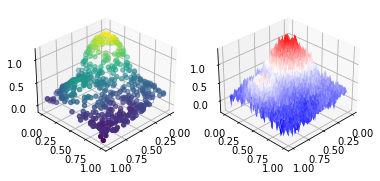

In [309]:
%matplotlib inline
X = create_X(x = xvec[0].ravel(), y = xvec[1].ravel(), n = 3)[:,1:]

fig, axs = plt.subplots(1,2,subplot_kw={'projection' : '3d'})
#axs[0].plot_surface(x, y, z, cmap = plt.cm.coolwarm)
#axs[0].scatter(Xtrain[:,0], Xtrain[:,1], 
#               np.mean(ztilde_train[:,3], axis=1), 
#               c=np.mean(ztilde_train[:,3], axis=1), cmap = plt.cm.coolwarm)
axs[0].scatter(Xtest[:,0], Xtest[:,1], 
               np.mean(ztilde_test[:,3], axis=1), 
               c=np.mean(ztilde_test[:,3], axis=1), cmap = plt.cm.viridis)
#axs[0].plot_surface(x, y, (X@np.mean(betas[2][:,0], axis=1) + np.mean(znoisy)).reshape(z.shape), cmap = plt.cm.coolwarm)
axs[1].plot_surface(x, y, znoisy, cmap = plt.cm.bwr)
[ax.view_init(30,45) for ax in axs]

## Coefficients against the regularization parameter

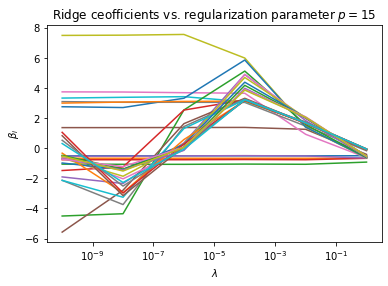

In [310]:
plt.figure()
plt.title("Ridge ceofficients vs. regularization parameter $p = %i$"%p)
plt.ylabel("$\\beta_i$")
for ip in range(model_complexity):
    [plt.plot(lambdas, np.mean(betas[ip][i], axis=-1)) for i in range(betas[0].shape[0])]
plt.xscale('log')
plt.xlabel("$\\lambda$")
fig.savefig(os.getcwd() + "/figs/partE/ridge_betas_vs_lambdas_p%i_bootstrap_B%i_N%i.png"%(ps[-1],B,N), dpi=150) 

## Bias-variance and MSE analysis

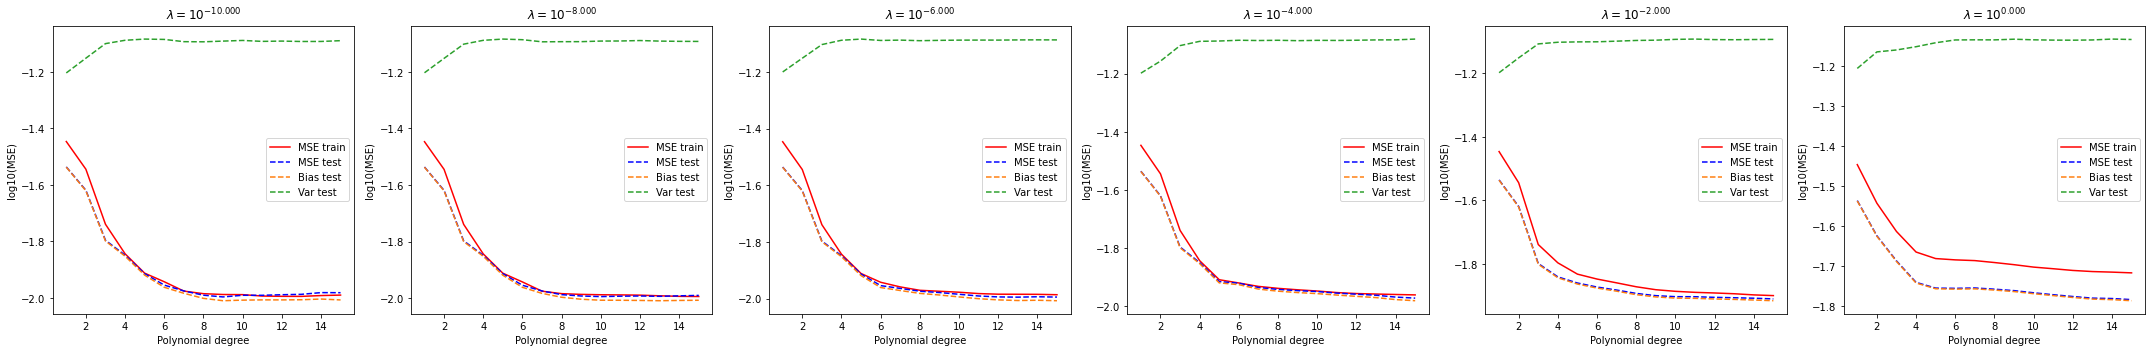

In [311]:
fig, axs = plt.subplots(1,len(lambdas), figsize=(len(lambdas)*5,5))

ps = np.arange(model_complexity)+1

for i in range(len(lambdas)):
    if lambdas[i] == 0:
        axs[i].set_title("$\\lambda = 0$")
    else:    
        axs[i].set_title("$\\lambda = 10^{%.3f}$"%np.log10(lambdas[i]))
    axs[i].plot(ps, np.log10(mses_train[:,i]),  label="MSE train",  color = 'r')
    axs[i].plot(ps, np.log10(mses_test[:,i]),  label="MSE test",  color = 'b', ls='--')
    
    axs[i].plot(ps, np.log10(bias_test[:,i]),  label="Bias test", color = 'C1', ls='--')
    axs[i].plot(ps, np.log10(var_test[:,i]),  label="Var test",  color = 'C2', ls='--')
    #axs[i].plot(ps, np.log10(bias_test[:,i] + var_test[:,i] + np.var(noise)),  label="Bias + Var(model) + Var(noise)",  color = 'C4', ls='--')
    
[ax.set_ylabel("log10(MSE)") for ax in axs]
[ax.set_xlabel("Polynomial degree") for ax in axs]
[ax.legend() for ax in axs]
fig.tight_layout()
fig.savefig(os.getcwd() + "/figs/partE/bias_var_tradeoff_ridge_p%i_lambda_min5_5_bootstrap_B%i.png"%(ps[-1],B), dpi=150) 

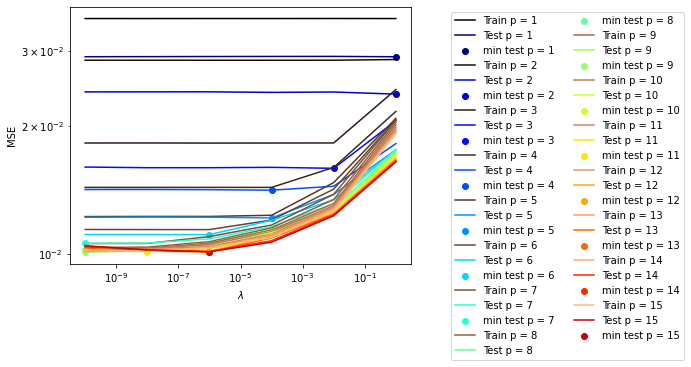

In [312]:
carr = np.arange(mses_train.shape[0])/mses_train.shape[0]
cs_train = plt.cm.copper(carr)
cs_test = plt.cm.jet(carr)
fig, ax = plt.subplots(1,1, figsize=(10,5))
for ip in range(mses_train.shape[0]):
    ax.plot(lambdas, mses_train[ip], color = cs_train[ip], label="Train p = %i"%(ip+1))
    ax.plot(lambdas, mses_test[ip], color = cs_test[ip], label="Test p = %i"%(ip+1))
    ax.scatter(lambdas[mses_test[ip] == min(mses_test[ip])], 
               min(mses_test[ip]), label="min test p = %i"%(ip+1), color = cs_test[ip])
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim(.9,1.3)
ax.set_ylabel("MSE")
ax.set_xlabel("$\\lambda$")
ax.legend(bbox_to_anchor=(1.1,.9,0,.1), ncol=2)
fig.tight_layout()
fig.savefig(os.getcwd() + "/figs/partE/log10mse_vs_lambdas_train_test_ridge_p15_bootstrap_B100.png", dpi = 150)

# f) Lasso

## Test case: comparison with lecturers example

In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
np.random.seed(6666)

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

X = np.array( [ [ 2., 0.], [0., 1.], [0.,0.]])
y = np.array( [4., 2., 3.])


# matrix inversion to find beta
OLSbeta = np.linalg.inv(X.T @ X) @ X.T @ y
print(OLSbeta)
# and then make the prediction
ytildeOLS = X @ OLSbeta
print("Training MSE for OLS")
print(MSE(y,ytildeOLS))
ypredictOLS = X @ OLSbeta

# Repeat now for Ridge regression and various values of the regularization parameter
I = np.eye(2,2)
# Decide which values of lambda to use
nlambdas = 100
MSERidgePredict = np.zeros(nlambdas)
MSELassoPredict = np.zeros(nlambdas)
lambdas = np.logspace(-4, 4, nlambdas)
for i in range(nlambdas):
    lmb = lambdas[i]
    X_scaled = scale_center_X(X = X)
    Ridgebeta = np.linalg.inv(X_scaled.T @ X_scaled+lmb*I) @ X_scaled.T @ (y-np.mean(y))
    #print(Ridgebeta)
    # and then make the prediction
    ypredictRidge = X_scaled @ Ridgebeta + np.mean(y)
    MSERidgePredict[i] = MSE(y,ypredictRidge)
    RegLasso = linear_model.Lasso(lmb)
    RegLasso.fit(X_scaled,y-np.mean(y))
    ypredictLasso = RegLasso.predict(X_scaled) + np.mean(y)
    #print(RegLasso.coef_)
    MSELassoPredict[i] = MSE(y,ypredictLasso)

[2. 2.]
Training MSE for OLS
3.0


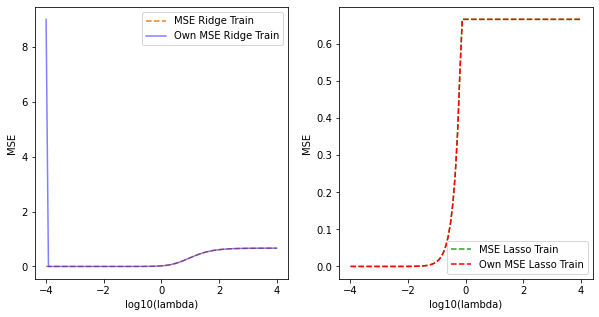

In [32]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *

MSERidgePredict_own = np.zeros(nlambdas)
MSELassoPredict_own = np.zeros(nlambdas)
for i in range(nlambdas):
    ypredictRidge_own, Ridgebeta_own = ridge_fp_wo_split(X = X, y = y, lmbda=lambdas[i], scale_center=True)
    # and then make the prediction
    MSERidgePredict_own[i] = MSE(y,ypredictRidge_own)
    ypredictLasso_own,Lassobeta_own  = lasso_fp_wo_split(X = X, y = y, lmbda=lambdas[i], scale_center=True)
    MSELassoPredict_own[i] = MSE(y,ypredictLasso_own)
# Now plot the results
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(np.log10(lambdas), MSERidgePredict, 'C1--', label = 'MSE Ridge Train')
axs[1].plot(np.log10(lambdas), MSELassoPredict, 'C2--', label = 'MSE Lasso Train')
axs[0].plot(np.log10(lambdas), MSERidgePredict_own, 'b-', label = 'Own MSE Ridge Train', alpha=0.5)
axs[1].plot(np.log10(lambdas), MSELassoPredict_own, 'r--', label = 'Own MSE Lasso Train')
[ax.set_xlabel('log10(lambda)') for ax in axs]
[ax.set_ylabel('MSE') for ax in axs]
[ax.legend() for ax in axs]

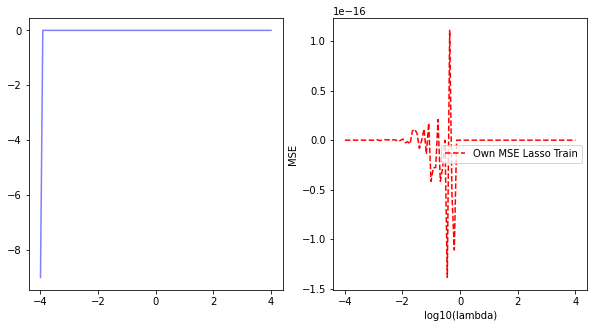

In [33]:
# Now plot the difference of the results
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(np.log10(lambdas), MSERidgePredict-MSERidgePredict_own, 'b-', label = 'Own MSE Ridge Train', alpha=0.5)
axs[1].plot(np.log10(lambdas), MSELassoPredict-MSELassoPredict_own, 'r--', label = 'Own MSE Lasso Train')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Franke function
### Bootstrapping bias-variacne trade-off

[None, None]

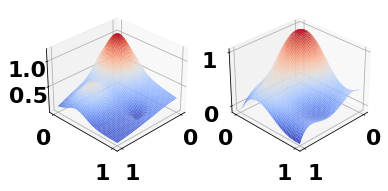

In [334]:
import numpy as np
import importlib; import project1; importlib.reload(project1); from project1.project1 import *

N = 50
p = 5
lmbda = 1e-2
x, y = np.meshgrid(np.linspace(0,1,N),np.linspace(0,1,N))
xvec = np.array([x,y])
X = create_X(x = x.ravel(), y=y.ravel(), n = p)
z = FrankeFunction(**{'x%i'%i: xvec[i] for i in range(len(xvec))})
noise = np.random.normal(0,.1,size=z.shape)
znoisy = z + noise
#ztilde_test, betahat = lasso_fp_wo_split(X=X, y=znoisy.ravel(), lmbda = lmbda, scale_center=False)
ztilde_test, betahat = ridge_fp_wo_split(X=X, y=znoisy.ravel(), lmbda = lmbda, scale_center=False)
#ztilde_test, betahat = ols_fp_wo_split(X=X, y=znoisy.ravel())

fig, axs = plt.subplots(1,2,subplot_kw={'projection' : '3d'})
axs[0].plot_surface(x, y, z, cmap = plt.cm.coolwarm)
#axs[0].plot_surface(x, y, z-ztilde_test.reshape(z.shape), cmap = plt.cm.coolwarm)

axs[1].plot_surface(x, y, ztilde_test.reshape(z.shape), cmap = plt.cm.coolwarm)
[ax.view_init(30,45) for ax in axs]

## Using SL

In [335]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

model_complexity = 15
k = 50 
lambdas = np.logspace(-5,-2, 10)

mses_train, var_train, bias_train = np.zeros((model_complexity,len(lambdas))), np.zeros((model_complexity,len(lambdas))),np.zeros((model_complexity, len(lambdas))) 
mses_test, var_test, bias_test = np.zeros((model_complexity,len(lambdas))), np.zeros((model_complexity, len(lambdas))),np.zeros((model_complexity,len(lambdas)))
betas = []
for p in range(1,model_complexity+1):
    print(p)
    X = create_X(x = xvec[0].ravel(), y = xvec[1].ravel(), n = p)
    Xtrain, Xtest, ztrain, ztest = train_test_split(X, znoisy.ravel(), test_size=0.2, random_state=666)
    ztilde_train = np.zeros(tuple(list(ztrain.shape) + [len(lambdas),k]))
    ztilde_test = np.zeros(tuple(list(ztest.shape) + [len(lambdas),k]))
    betas_ip = np.zeros((X.shape[1],len(lambdas), k))
    for ik in range(k):
        z_resampled,Xtrain_resampled = resample(ztrain, Xtrain)        
        for i in range(len(lambdas)):
            lasso = Lasso(alpha = lambdas[i], fit_intercept=True)
            lasso.fit(Xtrain_resampled, z_resampled)
            ztilde_train[:,i,ik] = lasso.predict(Xtrain)
            ztilde_test[:,i,ik] = lasso.predict(Xtest)
            betas_ip[:,i,ik] = lasso.coef_
    betas.append(betas_ip)
    # compute mse, bias and variances
    for i in range(len(lambdas)):
        mses_train[p-1,i] = np.mean(np.mean((ztrain[:,np.newaxis] - ztilde_train[:,i])**2, axis = 1))
        var_train[p-1,i] = np.mean(np.var(ztilde_train[:,i], axis = 1))

        mses_test[p-1,i] = np.mean(np.mean((ztest[:,np.newaxis] - ztilde_test[:,i])**2, axis = 1))
        var_test[p-1,i] = np.mean(np.var(ztilde_test[:,i], axis=1))

        bias_train[p-1,i] = np.mean((ztrain[:,np.newaxis] - np.mean(ztilde_train[:,i],axis=1))**2)
        bias_test[p-1,i] = np.mean((ztest[:,np.newaxis] - np.mean(ztilde_test[:,i],axis=1))**2)

1
2
3


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.207e+01, tolerance: 1.802e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+00, tolerance: 1.802e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.812e+00, tolerance: 1.741e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.817e+00, tolerance: 1.741e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.965e-02, tolerance: 1.847e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.187e+01, tolerance: 1.743e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.037e+01, tolerance: 1.852e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.917e+00, tolerance: 1.852e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.122e+00, tolerance: 1.931e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.844e-01, tolerance: 1.931e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.234e+01, tolerance: 1.819e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.528e+00, tolerance: 1.819e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.992e+00, tolerance: 1.894e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.081e-01, tolerance: 1.894e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.272e+01, tolerance: 1.798e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.017e+00, tolerance: 1.798e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.283e+00, tolerance: 1.704e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.132e-02, tolerance: 1.704e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.285e+01, tolerance: 1.884e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.137e+00, tolerance: 1.884e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.373e-01, tolerance: 1.888e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.301e-01, tolerance: 1.888e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.293e+01, tolerance: 1.842e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.002e+00, tolerance: 1.842e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

4


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.459e+01, tolerance: 1.756e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+01, tolerance: 1.756e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.365e+01, tolerance: 1.766e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.206e+00, tolerance: 1.766e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.380e+01, tolerance: 1.920e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.535e+00, tolerance: 1.920e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.358e+00, tolerance: 1.915e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.322e+00, tolerance: 1.915e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.124e+00, tolerance: 1.716e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.646e+00, tolerance: 1.716e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.982e+00, tolerance: 1.804e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.371e+00, tolerance: 1.804e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.980e+00, tolerance: 1.833e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.968e+00, tolerance: 1.833e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.755e+00, tolerance: 1.758e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.163e+00, tolerance: 1.758e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+01, tolerance: 1.946e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.659e+00, tolerance: 1.946e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.089e+01, tolerance: 1.871e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.984e+00, tolerance: 1.871e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.574e+00, tolerance: 1.920e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.711e+00, tolerance: 1.920e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

5


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.531e+01, tolerance: 1.842e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.336e+01, tolerance: 1.842e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.524e+00, tolerance: 1.718e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.131e-01, tolerance: 1.718e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.088e+00, tolerance: 1.766e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.104e+00, tolerance: 1.766e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.316e+01, tolerance: 1.825e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.360e+00, tolerance: 1.825e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.255e+00, tolerance: 1.764e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.902e+00, tolerance: 1.764e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.219e-01, tolerance: 1.806e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.596e+01, tolerance: 1.962e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.733e+00, tolerance: 1.830e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.531e-01, tolerance: 1.830e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.149e+00, tolerance: 1.879e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.841e+00, tolerance: 1.879e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.121e+00, tolerance: 1.779e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.277e+00, tolerance: 1.779e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.366e+01, tolerance: 1.820e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.872e+00, tolerance: 1.820e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.333e+00, tolerance: 1.772e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e-01, tolerance: 1.772e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

6


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.502e+01, tolerance: 1.766e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.365e+01, tolerance: 1.766e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.633e-01, tolerance: 1.899e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.839e-02, tolerance: 1.899e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.052e+01, tolerance: 1.879e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.035e+00, tolerance: 1.879e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.567e+01, tolerance: 1.872e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.401e+01, tolerance: 1.872e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.855e-01, tolerance: 1.816e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.987e-02, tolerance: 1.816e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.016e+01, tolerance: 1.889e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.982e+00, tolerance: 1.889e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.552e+01, tolerance: 1.838e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.417e+01, tolerance: 1.838e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.799e-01, tolerance: 1.809e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.464e+01, tolerance: 1.884e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.728e+00, tolerance: 1.874e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.262e+00, tolerance: 1.874e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.523e+01, tolerance: 1.903e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.381e+01, tolerance: 1.903e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.416e+01, tolerance: 1.884e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.099e+01, tolerance: 1.884e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

7


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.443e+01, tolerance: 1.868e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.287e+01, tolerance: 1.868e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.406e+01, tolerance: 1.826e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.253e+01, tolerance: 1.826e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.054e+00, tolerance: 1.879e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.620e-01, tolerance: 1.879e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.415e+01, tolerance: 1.892e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.273e+01, tolerance: 1.892e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.445e+01, tolerance: 1.891e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.286e+01, tolerance: 1.891e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.757e+00, tolerance: 1.842e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.553e-01, tolerance: 1.842e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.516e+00, tolerance: 1.890e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.625e-01, tolerance: 1.890e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.471e+00, tolerance: 1.791e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.462e-01, tolerance: 1.791e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.412e+00, tolerance: 1.742e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.935e-01, tolerance: 1.742e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.464e+01, tolerance: 1.813e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+01, tolerance: 1.813e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.764e+00, tolerance: 1.914e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.381e-01, tolerance: 1.914e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.931e+00, tolerance: 1.879e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.873e-01, tolerance: 1.879e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

8


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.410e+01, tolerance: 1.828e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+01, tolerance: 1.828e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.392e+01, tolerance: 1.888e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.204e+01, tolerance: 1.888e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.472e+01, tolerance: 1.957e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.284e+01, tolerance: 1.957e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.265e+00, tolerance: 1.754e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.854e-01, tolerance: 1.754e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.184e+00, tolerance: 1.828e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.425e-01, tolerance: 1.828e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.842e+00, tolerance: 1.902e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.705e-01, tolerance: 1.902e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.207e+00, tolerance: 1.983e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.126e-01, tolerance: 1.983e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.118e+00, tolerance: 1.787e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.440e-01, tolerance: 1.787e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.547e+00, tolerance: 1.956e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.996e-01, tolerance: 1.956e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.971e+00, tolerance: 1.901e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.688e-01, tolerance: 1.901e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.451e+00, tolerance: 1.968e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.962e-01, tolerance: 1.968e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.819e+00, tolerance: 1.855e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.144e-01, tolerance: 1.855e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.389e+01, tolerance: 1.916e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.193e+01, tolerance: 1.916e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

9


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.379e+01, tolerance: 1.899e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.204e+01, tolerance: 1.899e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.398e+01, tolerance: 1.874e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.225e+01, tolerance: 1.874e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.375e+01, tolerance: 1.786e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.189e+01, tolerance: 1.786e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.853e+00, tolerance: 1.733e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.821e+00, tolerance: 1.733e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.851e+00, tolerance: 1.804e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.891e+00, tolerance: 1.804e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.295e+00, tolerance: 1.869e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.750e+00, tolerance: 1.869e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.856e+00, tolerance: 1.827e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.238e+00, tolerance: 1.827e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.632e-01, tolerance: 1.810e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.510e-02, tolerance: 1.810e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.674e-01, tolerance: 1.835e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.363e+01, tolerance: 1.692e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.348e+01, tolerance: 1.820e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.183e+01, tolerance: 1.820e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+01, tolerance: 1.839e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.240e+00, tolerance: 1.839e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+01, tolerance: 1.799e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.131e+00, tolerance: 1.799e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.326e+00, tolerance: 1.802e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.097e+00, tolerance: 1.802e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

10


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.434e+01, tolerance: 1.915e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.255e+01, tolerance: 1.915e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.925e-02, tolerance: 1.829e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.410e+01, tolerance: 1.922e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.476e-02, tolerance: 1.955e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.442e+01, tolerance: 1.851e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.446e-02, tolerance: 1.814e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.374e+01, tolerance: 1.832e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.371e+01, tolerance: 1.745e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.166e+01, tolerance: 1.745e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.531e+00, tolerance: 1.750e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.306e+00, tolerance: 1.750e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.868e+00, tolerance: 1.958e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.457e+00, tolerance: 1.958e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.396e+01, tolerance: 1.882e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+01, tolerance: 1.882e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.434e+00, tolerance: 1.920e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.078e+00, tolerance: 1.920e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.964e+00, tolerance: 1.692e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.142e+00, tolerance: 1.692e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.830e+00, tolerance: 1.944e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.100e+00, tolerance: 1.944e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.725e+00, tolerance: 1.836e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.593e+00, tolerance: 1.836e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.562e+00, tolerance: 1.780e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.452e+00, tolerance: 1.780e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

11


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.372e+01, tolerance: 1.893e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.203e+01, tolerance: 1.893e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.450e-02, tolerance: 1.848e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.339e+01, tolerance: 1.783e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e-01, tolerance: 1.902e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.151e-02, tolerance: 1.902e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.420e+01, tolerance: 1.941e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.261e+01, tolerance: 1.941e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.338e+01, tolerance: 1.788e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+01, tolerance: 1.788e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.727e-02, tolerance: 1.781e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.328e+01, tolerance: 1.842e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.568e-02, tolerance: 1.897e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.389e+01, tolerance: 1.856e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e-01, tolerance: 1.945e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.303e+01, tolerance: 1.706e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.272e-02, tolerance: 1.807e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.405e+01, tolerance: 1.818e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.493e-02, tolerance: 1.840e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.571e-02, tolerance: 1.840e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.595e-02, tolerance: 1.764e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.349e-02, tolerance: 1.764e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.521e-02, tolerance: 1.837e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.443e+01, tolerance: 1.917e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.447e-02, tolerance: 1.841e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.368e+01, tolerance: 1.758e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

12


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.409e+01, tolerance: 1.763e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.249e+01, tolerance: 1.763e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.683e-01, tolerance: 1.782e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.384e-02, tolerance: 1.782e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.203e-01, tolerance: 1.824e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.458e+01, tolerance: 1.952e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.485e-01, tolerance: 1.887e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.341e-02, tolerance: 1.887e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.766e-01, tolerance: 1.684e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.487e-02, tolerance: 1.684e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.916e-01, tolerance: 1.856e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.271e-02, tolerance: 1.856e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.545e-01, tolerance: 1.954e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+01, tolerance: 1.911e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.948e-01, tolerance: 1.759e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.227e-02, tolerance: 1.759e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.708e-01, tolerance: 1.754e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.056e-02, tolerance: 1.754e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.551e-01, tolerance: 1.894e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.355e+01, tolerance: 1.865e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.701e-01, tolerance: 1.848e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.391e+01, tolerance: 1.864e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.678e-01, tolerance: 1.902e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.078e-02, tolerance: 1.902e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.375e-01, tolerance: 1.844e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.099e-01, tolerance: 1.844e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

13


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.380e+01, tolerance: 1.844e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+01, tolerance: 1.844e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+01, tolerance: 1.889e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.226e+01, tolerance: 1.889e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.433e+01, tolerance: 1.864e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.288e+01, tolerance: 1.864e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.424e+01, tolerance: 1.928e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.254e+01, tolerance: 1.928e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.476e+01, tolerance: 1.813e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.309e+01, tolerance: 1.813e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.319e+01, tolerance: 1.804e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.163e+01, tolerance: 1.804e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.841e+00, tolerance: 1.852e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.360e+00, tolerance: 1.852e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.362e+00, tolerance: 1.845e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.477e+00, tolerance: 1.845e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.596e+00, tolerance: 1.766e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.873e+00, tolerance: 1.766e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.669e+00, tolerance: 1.858e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.779e+00, tolerance: 1.858e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.970e+00, tolerance: 1.825e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.344e+00, tolerance: 1.825e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.921e+00, tolerance: 1.801e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.775e+00, tolerance: 1.801e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.248e+00, tolerance: 1.895e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.748e+00, tolerance: 1.895e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

14


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.406e+01, tolerance: 1.878e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.284e+01, tolerance: 1.878e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.111e-02, tolerance: 1.843e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.456e+01, tolerance: 1.829e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.459e-02, tolerance: 1.729e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.339e+01, tolerance: 1.749e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.500e+01, tolerance: 1.889e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.343e+01, tolerance: 1.889e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.837e+00, tolerance: 1.937e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.504e-01, tolerance: 1.937e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.966e+00, tolerance: 1.774e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.574e+00, tolerance: 1.774e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.423e+01, tolerance: 1.847e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.265e+01, tolerance: 1.847e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.364e+01, tolerance: 1.878e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.190e+01, tolerance: 1.878e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.408e+01, tolerance: 1.924e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.264e+01, tolerance: 1.924e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.379e+01, tolerance: 1.879e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.234e+01, tolerance: 1.879e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.491e+01, tolerance: 1.918e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.324e+01, tolerance: 1.918e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.511e-01, tolerance: 1.876e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.867e-02, tolerance: 1.876e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.587e-01, tolerance: 1.880e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.350e+01, tolerance: 1.815e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

15


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.434e+01, tolerance: 1.891e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.257e+01, tolerance: 1.891e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.437e+01, tolerance: 1.925e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.296e+01, tolerance: 1.925e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.560e-02, tolerance: 1.756e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.462e+01, tolerance: 1.887e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.305e-02, tolerance: 1.874e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.064e-02, tolerance: 1.874e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.093e+00, tolerance: 1.847e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.178e-01, tolerance: 1.847e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.009e+00, tolerance: 1.842e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.448e-01, tolerance: 1.842e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.102e+00, tolerance: 1.808e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.236e-01, tolerance: 1.808e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.429e+01, tolerance: 1.941e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.289e+01, tolerance: 1.941e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.346e+01, tolerance: 1.758e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.191e+01, tolerance: 1.758e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.296e-01, tolerance: 1.882e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.325e+01, tolerance: 1.767e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.423e+00, tolerance: 1.910e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.394e-01, tolerance: 1.910e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.695e+00, tolerance: 1.883e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.555e-01, tolerance: 1.883e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.009e+00, tolerance: 1.919e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.789e-01, tolerance: 1.919e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

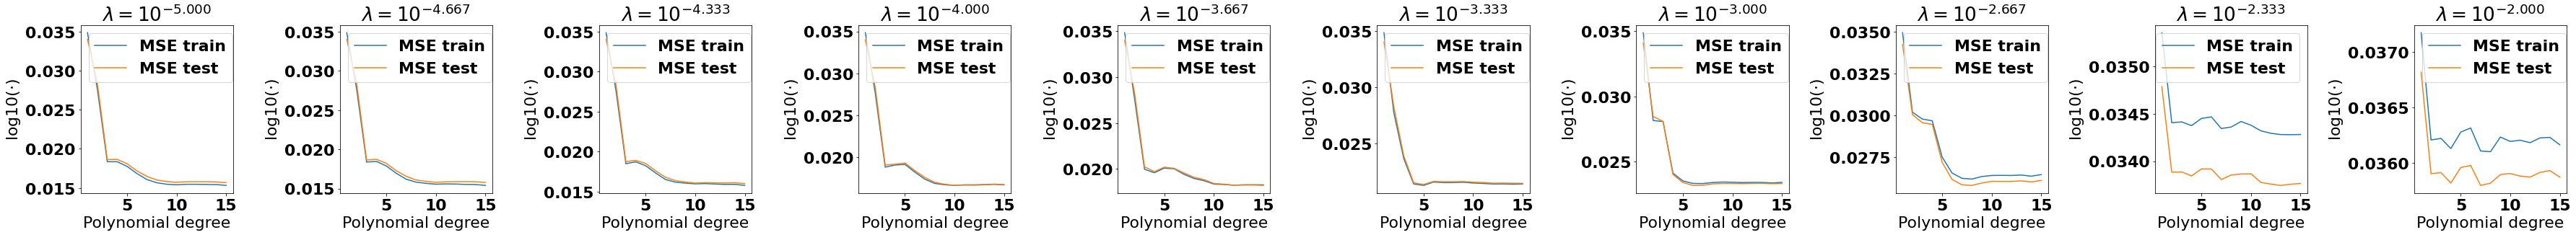

In [336]:
fig, axs = plt.subplots(1,10, figsize=(50,5))
ps = np.arange(model_complexity)+1
j = 0
for i in range(len(lambdas)):
    if lambdas[i] == 0:
        axs[j].set_title("$\\lambda = 0$")
    else:
        axs[j].set_title("$\\lambda = 10^{%.3f}$"%np.log10(lambdas[i]))
    axs[j].plot(ps, mses_train[:,i], label="MSE train")
    axs[j].plot(ps, mses_test[:,i], label="MSE test")
    
    #axs[j].plot(ps, np.log10(bias_test[:,i]), label="Bias")
    #axs[j].plot(ps, np.log10(var_test[:,i]), label="Var")
    j+=1
[ax.set_ylabel("log10($\\cdot$)") for ax in axs]
[ax.set_xlabel("Polynomial degree") for ax in axs]
[ax.legend() for ax in axs]
fig.tight_layout()

Text(0.5, 0, '$\\lambda$')

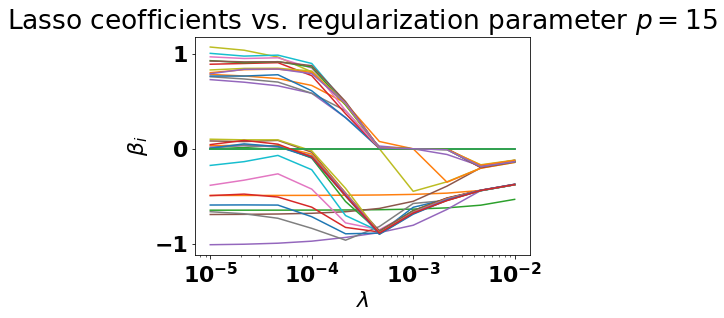

In [337]:
plt.figure()
plt.title("Lasso ceofficients vs. regularization parameter $p = %i$"%p)
plt.ylabel("$\\beta_i$")
for ip in range(model_complexity):
    [plt.plot(lambdas, np.mean(betas[ip][i], axis=-1)) for i in range(betas[0].shape[0])]
plt.xscale('log')
plt.xlabel("$\\lambda$")

## Own implementation sort of

In [338]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
B = 50 
mses_train, var_train, bias_train = np.zeros((model_complexity,len(lambdas))), np.zeros((model_complexity,len(lambdas))),np.zeros((model_complexity, len(lambdas))) 
mses_test, var_test, bias_test = np.zeros((model_complexity,len(lambdas))), np.zeros((model_complexity, len(lambdas))),np.zeros((model_complexity,len(lambdas)))
betas = []
for p in range(1,model_complexity+1):
    print(p)
    X = create_X(x = xvec[0].ravel(), y = xvec[1].ravel(), n = p)[:,1:]    
    Xtrain, Xtest, ztrain, ztest = train_test_split(X, znoisy.ravel(), test_size=0.2, random_state=666)
    ztilde_train = np.zeros(tuple(list(ztrain.shape) + [len(lambdas),B]))
    ztilde_test = np.zeros(tuple(list(ztest.shape) + [len(lambdas),B]))
    betas_ip = np.zeros((X.shape[1],len(lambdas), B))
    for i in range(len(lambdas)):
        for ik in range(B):
            z_resampled,Xtrain_resampled = resample(data = ztrain, design_matrix = Xtrain)
            Xtest_scaled = (Xtest - np.mean(Xtrain_resampled,axis=0))#/np.std(Xtrain_resampled, axis=0)
        
            ztilde_train[:,i,ik],betahat = lasso_fp_wo_split(X=Xtrain_resampled, 
                                                             y=z_resampled, 
                                                             lmbda = lambdas[i], scale_center=True)
            ztilde_test[:,i,ik] = Xtest_scaled@betahat + np.mean(z_resampled)
            betas_ip[:,i,ik] = betahat
    betas.append(betas_ip)
    # compute mse, bias and variances
    for i in range(len(lambdas)):
        mses_train[p-1, i] = np.mean(np.mean((ztrain[:,np.newaxis]- ztilde_train[:,i])**2, axis = 1, keepdims=True))
        bias_train[p-1, i] = exp_bias(ztrain, exp_ytilde = np.mean(ztilde_train[:,i], axis=1, keepdims = True))
        var_train[p-1, i] = np.mean(np.var(ztilde_train[:,i], axis=0))

        mses_test[p-1, i] = np.mean(np.mean((ztest[:,np.newaxis]- ztilde_test[:,i])**2, axis = 1, keepdims=True))
        bias_test[p-1, i] = exp_bias(ztest, exp_ytilde = np.mean(ztilde_test[:,i], axis=1, keepdims = True))
        var_test[p-1, i] = np.mean(np.var(ztilde_test[:,i], axis=0))

1
2
3


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.597e+01, tolerance: 1.850e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.724e+01, tolerance: 1.858e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.730e+01, tolerance: 1.926e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.761e+01, tolerance: 1.866e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.493e+01, tolerance: 1.859e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.468e+01, tolerance: 1.816e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.438e+01, tolerance: 1.830e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.516e+01, tolerance: 1.883e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e+01, tolerance: 1.763e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.093e+01, tolerance: 1.899e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+01, tolerance: 1.759e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.255e+01, tolerance: 1.898e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.808e+00, tolerance: 1.908e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.553e+00, tolerance: 1.850e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.829e+00, tolerance: 1.845e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.168e+00, tolerance: 1.858e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.848e+00, tolerance: 1.810e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.518e+00, tolerance: 1.854e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.993e+00, tolerance: 1.873e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.498e+00, tolerance: 1.825e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.718e-01, tolerance: 1.835e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.402e-01, tolerance: 1.828e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.187e-01, tolerance: 1.813e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.155e+00, tolerance: 1.796e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e-01, tolerance: 1.767e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.252e-01, tolerance: 1.882e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.091e-02, tolerance: 1.822e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.218e-02, tolerance: 1.863e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.011e-02, tolerance: 1.703e-02
  model = cd_fast.enet_coordinate_descent(


4


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.717e+01, tolerance: 1.846e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.706e+01, tolerance: 1.794e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.707e+01, tolerance: 1.839e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.746e+01, tolerance: 1.856e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.675e+01, tolerance: 1.879e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.696e+01, tolerance: 1.818e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.524e+01, tolerance: 1.926e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.517e+01, tolerance: 1.824e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.585e+01, tolerance: 1.886e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.569e+01, tolerance: 1.964e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.210e+01, tolerance: 1.751e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.289e+01, tolerance: 1.737e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.310e+01, tolerance: 1.865e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+01, tolerance: 1.834e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.006e+00, tolerance: 1.736e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.777e+00, tolerance: 1.862e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.990e+00, tolerance: 1.834e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.931e+00, tolerance: 1.896e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.473e+00, tolerance: 1.841e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e-01, tolerance: 1.835e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.804e-01, tolerance: 1.813e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.265e+00, tolerance: 1.901e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.085e-01, tolerance: 1.980e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.023e-01, tolerance: 1.756e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.097e-01, tolerance: 1.842e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.584e-01, tolerance: 1.806e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.776e-01, tolerance: 1.870e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.959e-01, tolerance: 1.943e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.941e-01, tolerance: 1.880e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.108e-01, tolerance: 1.910e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

5


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.641e+01, tolerance: 1.777e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.747e+01, tolerance: 1.863e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.590e+01, tolerance: 1.778e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.699e+01, tolerance: 1.864e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.603e+01, tolerance: 1.847e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.532e+01, tolerance: 1.802e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.463e+01, tolerance: 1.808e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.625e+01, tolerance: 1.894e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.429e+01, tolerance: 1.950e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.494e+01, tolerance: 1.904e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.377e+01, tolerance: 1.812e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.537e+01, tolerance: 1.963e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.245e+01, tolerance: 1.870e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.079e+01, tolerance: 1.804e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+01, tolerance: 1.892e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.088e+01, tolerance: 1.798e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e+01, tolerance: 1.848e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.005e+00, tolerance: 1.886e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.190e+00, tolerance: 1.795e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.341e+00, tolerance: 1.745e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.140e+00, tolerance: 1.886e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e+00, tolerance: 1.898e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.288e-01, tolerance: 1.842e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.133e-01, tolerance: 1.828e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.336e+00, tolerance: 1.897e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.279e-01, tolerance: 1.850e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.299e-01, tolerance: 1.980e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.281e-01, tolerance: 1.781e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.515e-01, tolerance: 1.766e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.807e-01, tolerance: 1.750e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.662e-02, tolerance: 1.866e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.761e-02, tolerance: 1.813e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

6


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.553e+01, tolerance: 1.757e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.649e+01, tolerance: 1.828e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.581e+01, tolerance: 1.745e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.601e+01, tolerance: 1.884e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.603e+01, tolerance: 1.831e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.545e+01, tolerance: 1.861e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.540e+01, tolerance: 1.882e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.542e+01, tolerance: 1.887e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.602e+01, tolerance: 1.898e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.524e+01, tolerance: 1.907e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.489e+01, tolerance: 1.946e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.458e+01, tolerance: 1.832e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.442e+01, tolerance: 1.858e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.517e+01, tolerance: 1.824e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.226e+01, tolerance: 1.894e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.285e+01, tolerance: 1.968e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.306e+01, tolerance: 1.855e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.279e+01, tolerance: 1.916e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.869e+00, tolerance: 1.860e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.386e+00, tolerance: 1.996e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.878e+00, tolerance: 1.897e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.768e+00, tolerance: 1.956e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.037e+00, tolerance: 1.795e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.010e+00, tolerance: 1.839e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.380e+00, tolerance: 1.884e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.885e+00, tolerance: 1.873e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.372e-01, tolerance: 1.817e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.291e-01, tolerance: 1.876e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.072e-01, tolerance: 1.844e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.405e-01, tolerance: 1.851e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.525e-02, tolerance: 1.805e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.694e-02, tolerance: 2.022e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

7


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.412e+01, tolerance: 1.749e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.507e+01, tolerance: 1.852e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.597e+01, tolerance: 1.996e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.562e+01, tolerance: 1.931e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.476e+01, tolerance: 1.793e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.590e+01, tolerance: 1.919e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.417e+01, tolerance: 1.848e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.487e+01, tolerance: 1.843e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.485e+01, tolerance: 1.862e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.491e+01, tolerance: 1.828e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.528e+01, tolerance: 2.037e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e+01, tolerance: 1.804e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+01, tolerance: 1.943e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.451e+01, tolerance: 1.901e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e+01, tolerance: 1.809e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+01, tolerance: 1.851e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.258e+01, tolerance: 1.935e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+01, tolerance: 1.765e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.808e+00, tolerance: 1.813e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.831e+00, tolerance: 1.822e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.860e+00, tolerance: 1.915e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.764e+00, tolerance: 1.760e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.709e+00, tolerance: 1.819e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.588e+00, tolerance: 1.851e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.424e+00, tolerance: 1.954e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.142e+00, tolerance: 1.825e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.051e-01, tolerance: 1.965e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.154e-01, tolerance: 1.857e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.217e-01, tolerance: 1.840e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.718e-01, tolerance: 1.963e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.763e-02, tolerance: 1.750e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.242e-02, tolerance: 1.782e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.265e-02, tolerance: 1.867e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.067e-02, tolerance: 1.888e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

8


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.425e+01, tolerance: 1.848e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.434e+01, tolerance: 1.811e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e+01, tolerance: 1.782e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.547e+01, tolerance: 1.900e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.477e+01, tolerance: 1.884e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.436e+01, tolerance: 1.834e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.444e+01, tolerance: 1.994e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.466e+01, tolerance: 1.907e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.415e+01, tolerance: 1.890e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.491e+01, tolerance: 1.929e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.300e+01, tolerance: 1.826e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.312e+01, tolerance: 1.829e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.313e+01, tolerance: 1.891e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.252e+01, tolerance: 1.752e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.097e+01, tolerance: 1.974e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+01, tolerance: 1.923e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.053e+01, tolerance: 1.847e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.099e+01, tolerance: 1.748e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.371e+00, tolerance: 1.860e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.903e+00, tolerance: 1.925e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.579e+00, tolerance: 1.784e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.732e+00, tolerance: 1.884e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.256e+00, tolerance: 1.862e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.236e+00, tolerance: 1.805e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.689e+00, tolerance: 1.791e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.670e+00, tolerance: 1.840e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.492e-01, tolerance: 1.867e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.523e-01, tolerance: 1.776e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.830e-01, tolerance: 1.872e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.390e-01, tolerance: 1.917e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.968e-02, tolerance: 1.755e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e-01, tolerance: 1.806e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.757e-02, tolerance: 1.837e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.840e-02, tolerance: 1.885e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

9


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.412e+01, tolerance: 1.794e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.439e+01, tolerance: 1.884e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.531e+01, tolerance: 1.872e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.521e+01, tolerance: 1.873e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.496e+01, tolerance: 1.850e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.401e+01, tolerance: 1.827e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.482e+01, tolerance: 1.880e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.421e+01, tolerance: 1.746e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.353e+01, tolerance: 1.736e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.404e+01, tolerance: 1.725e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.319e+01, tolerance: 1.914e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e+01, tolerance: 1.874e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+01, tolerance: 1.896e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.299e+01, tolerance: 1.830e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e+01, tolerance: 1.795e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+01, tolerance: 1.761e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.654e+00, tolerance: 1.863e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+01, tolerance: 1.910e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.302e+00, tolerance: 1.791e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.012e+00, tolerance: 1.842e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.915e+00, tolerance: 1.921e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.595e+00, tolerance: 1.824e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.510e+00, tolerance: 1.918e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.342e+00, tolerance: 1.826e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.769e+00, tolerance: 1.900e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.457e+00, tolerance: 1.738e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.293e-01, tolerance: 1.876e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.081e-01, tolerance: 1.856e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.534e-01, tolerance: 1.749e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.776e-01, tolerance: 1.903e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.507e-01, tolerance: 1.757e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.467e-01, tolerance: 1.886e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.498e-01, tolerance: 1.909e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.245e-01, tolerance: 1.868e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

10


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.472e+01, tolerance: 1.811e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.489e+01, tolerance: 1.826e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.465e+01, tolerance: 1.741e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.410e+01, tolerance: 1.861e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.472e+01, tolerance: 1.901e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.447e+01, tolerance: 1.878e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.358e+01, tolerance: 1.883e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.447e+01, tolerance: 1.973e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.461e+01, tolerance: 1.907e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+01, tolerance: 1.820e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.277e+01, tolerance: 1.800e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.240e+01, tolerance: 1.930e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.371e+01, tolerance: 1.906e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.202e+01, tolerance: 1.766e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e+01, tolerance: 1.905e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.891e+00, tolerance: 1.866e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.889e+00, tolerance: 1.891e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+01, tolerance: 1.748e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.653e+00, tolerance: 1.806e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.706e+00, tolerance: 1.859e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.772e+00, tolerance: 1.792e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.383e+00, tolerance: 1.888e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.014e+00, tolerance: 1.890e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.288e+00, tolerance: 1.928e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.570e-01, tolerance: 1.903e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.322e+00, tolerance: 1.855e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.835e-01, tolerance: 1.946e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.183e-01, tolerance: 1.847e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.125e-01, tolerance: 1.822e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.517e-01, tolerance: 1.756e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.671e-01, tolerance: 1.858e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.722e-02, tolerance: 1.898e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.840e-02, tolerance: 1.940e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e-01, tolerance: 1.800e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

11


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.546e+01, tolerance: 1.836e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.489e+01, tolerance: 1.757e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.489e+01, tolerance: 1.819e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.499e+01, tolerance: 1.788e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.487e+01, tolerance: 1.806e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.489e+01, tolerance: 1.874e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.383e+01, tolerance: 1.961e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.462e+01, tolerance: 1.920e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.452e+01, tolerance: 1.803e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.362e+01, tolerance: 1.814e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.315e+01, tolerance: 1.870e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.320e+01, tolerance: 1.854e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.242e+01, tolerance: 1.795e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.263e+01, tolerance: 1.824e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.097e+01, tolerance: 1.977e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.114e+01, tolerance: 1.929e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.107e+01, tolerance: 1.819e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.127e+01, tolerance: 1.974e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.283e+00, tolerance: 1.907e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.747e+00, tolerance: 1.939e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.035e+00, tolerance: 1.862e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.722e+00, tolerance: 1.873e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.715e-01, tolerance: 1.943e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.740e-01, tolerance: 1.824e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.262e-01, tolerance: 1.712e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.861e-01, tolerance: 1.860e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.581e-01, tolerance: 1.800e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.910e-01, tolerance: 1.865e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.752e-01, tolerance: 1.782e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.203e-01, tolerance: 1.837e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.714e-01, tolerance: 1.810e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.300e-01, tolerance: 1.833e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.804e-01, tolerance: 1.878e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e-01, tolerance: 1.895e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

12


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.466e+01, tolerance: 1.897e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.483e+01, tolerance: 1.911e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.508e+01, tolerance: 1.864e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.473e+01, tolerance: 1.810e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.512e+01, tolerance: 1.863e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.556e+01, tolerance: 1.903e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.379e+01, tolerance: 1.811e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.404e+01, tolerance: 1.786e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.488e+01, tolerance: 1.872e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.412e+01, tolerance: 1.806e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.403e+01, tolerance: 1.842e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.329e+01, tolerance: 1.869e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.323e+01, tolerance: 1.793e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.329e+01, tolerance: 1.807e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.125e+01, tolerance: 1.875e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.095e+01, tolerance: 1.804e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.053e+01, tolerance: 1.882e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+01, tolerance: 1.897e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+00, tolerance: 1.867e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.039e+00, tolerance: 1.857e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.666e+00, tolerance: 1.848e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.459e+00, tolerance: 1.851e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.532e+00, tolerance: 1.925e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.494e+00, tolerance: 1.881e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.321e-01, tolerance: 1.852e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.854e+00, tolerance: 1.843e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.172e-01, tolerance: 1.844e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.785e-01, tolerance: 1.947e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.608e-01, tolerance: 1.889e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.372e-01, tolerance: 1.844e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.497e-01, tolerance: 1.883e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.335e-02, tolerance: 1.801e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.237e-02, tolerance: 1.897e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.054e-02, tolerance: 1.823e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

13


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.493e+01, tolerance: 1.844e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.621e+01, tolerance: 1.998e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.497e+01, tolerance: 1.851e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.419e+01, tolerance: 1.884e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.354e+01, tolerance: 1.835e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.451e+01, tolerance: 1.892e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.460e+01, tolerance: 1.958e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.455e+01, tolerance: 1.854e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.416e+01, tolerance: 1.841e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.408e+01, tolerance: 1.782e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.342e+01, tolerance: 1.851e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.296e+01, tolerance: 1.946e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.338e+01, tolerance: 1.960e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.405e+01, tolerance: 1.855e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.146e+01, tolerance: 1.709e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+01, tolerance: 1.823e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+01, tolerance: 1.769e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.073e+01, tolerance: 1.744e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.375e+00, tolerance: 1.923e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.718e+00, tolerance: 1.917e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.902e+00, tolerance: 1.914e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.874e+00, tolerance: 1.816e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.426e+00, tolerance: 1.870e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.226e+00, tolerance: 1.945e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.305e+00, tolerance: 1.734e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.184e+00, tolerance: 1.881e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.823e-01, tolerance: 1.807e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.058e-01, tolerance: 1.874e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.120e-01, tolerance: 1.851e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.829e-01, tolerance: 1.872e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e-01, tolerance: 1.890e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.631e-02, tolerance: 1.859e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.002e-01, tolerance: 1.849e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.873e-01, tolerance: 1.803e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

14


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.470e+01, tolerance: 1.882e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.406e+01, tolerance: 1.853e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.435e+01, tolerance: 1.828e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.521e+01, tolerance: 2.009e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.394e+01, tolerance: 1.850e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.448e+01, tolerance: 1.816e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.466e+01, tolerance: 1.993e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.391e+01, tolerance: 1.713e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.412e+01, tolerance: 1.880e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.400e+01, tolerance: 1.905e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.412e+01, tolerance: 1.943e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.254e+01, tolerance: 1.666e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.283e+01, tolerance: 1.763e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e+01, tolerance: 1.768e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.183e+01, tolerance: 1.914e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+01, tolerance: 1.917e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+01, tolerance: 1.886e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.180e+01, tolerance: 1.887e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.896e+00, tolerance: 1.870e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.215e+00, tolerance: 1.792e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.996e+00, tolerance: 1.813e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.110e+00, tolerance: 1.832e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+00, tolerance: 1.848e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.434e+00, tolerance: 1.935e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.088e+00, tolerance: 1.830e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.037e+00, tolerance: 1.906e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.072e-01, tolerance: 1.821e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.514e-01, tolerance: 1.832e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.446e-01, tolerance: 1.837e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.771e-01, tolerance: 1.773e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.143e-02, tolerance: 1.916e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.942e-02, tolerance: 1.891e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.348e-01, tolerance: 1.884e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.951e-02, tolerance: 1.905e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.480e-02, tolerance: 1.863e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.528e-02, tolerance: 1.872e-02
  model = cd_fast.enet_coordinate_descent(


15


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.465e+01, tolerance: 1.845e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.438e+01, tolerance: 1.813e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.436e+01, tolerance: 1.759e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.387e+01, tolerance: 1.817e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.449e+01, tolerance: 1.964e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e+01, tolerance: 1.922e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.436e+01, tolerance: 1.909e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.434e+01, tolerance: 1.890e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.405e+01, tolerance: 1.763e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.426e+01, tolerance: 1.782e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.248e+01, tolerance: 1.808e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.298e+01, tolerance: 1.792e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.337e+01, tolerance: 1.797e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.302e+01, tolerance: 1.813e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+01, tolerance: 1.848e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.113e+01, tolerance: 1.897e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.184e+01, tolerance: 1.938e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.131e+01, tolerance: 1.887e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.041e+00, tolerance: 1.836e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.075e+00, tolerance: 1.874e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.201e+00, tolerance: 1.871e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.965e+00, tolerance: 1.902e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.467e+00, tolerance: 1.907e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.514e+00, tolerance: 1.934e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e+00, tolerance: 1.839e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.206e+00, tolerance: 1.885e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.131e-01, tolerance: 1.807e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.820e-01, tolerance: 1.847e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.796e-01, tolerance: 1.789e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.490e-01, tolerance: 1.766e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.667e-01, tolerance: 1.852e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.727e-02, tolerance: 1.868e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.610e-02, tolerance: 1.940e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.437e-02, tolerance: 1.928e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.876e-02, tolerance: 1.812e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.279e-02, tolerance: 1.740e-02
  model = cd_fast.enet_coordinate_descent(


## Lasso coefficients against regularization parameter

Text(0.5, 0, '$\\lambda$')

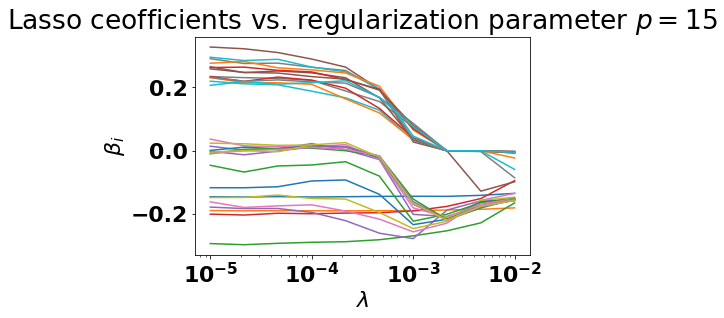

In [339]:
plt.figure()
plt.title("Lasso ceofficients vs. regularization parameter $p = %i$"%p)
plt.ylabel("$\\beta_i$")
for ip in range(model_complexity):
    [plt.plot(lambdas, np.mean(betas[ip][i], axis=-1)) for i in range(betas[0].shape[0])]
plt.xscale('log')
plt.xlabel("$\\lambda$")

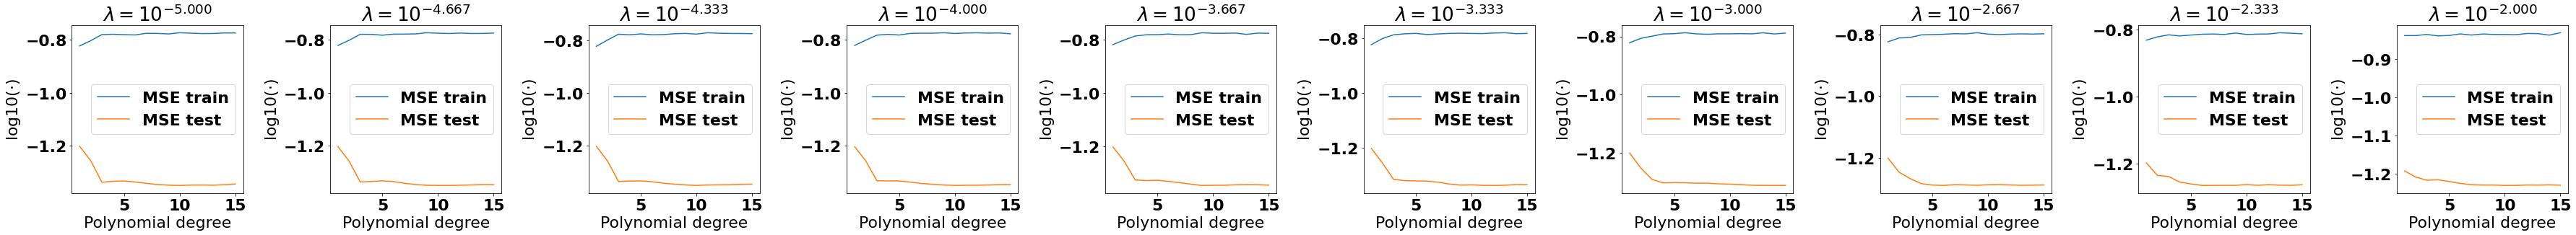

In [340]:
fig, axs = plt.subplots(1,10, figsize=(50,5))
ps = np.arange(model_complexity)+1
j = 0
for i in range(len(lambdas)):
    if lambdas[i] == 0:
        axs[j].set_title("$\\lambda = 0$")
    else:
        axs[j].set_title("$\\lambda = 10^{%.3f}$"%np.log10(lambdas[i]))
    axs[j].plot(ps, np.log10(mses_train[:,i]), label="MSE train")
    axs[j].plot(ps, np.log10(mses_test[:,i]), label="MSE test")
    
    #axs[j].plot(ps, np.log10(bias_test[:,i]), label="Bias")
    #axs[j].plot(ps, np.log10(var_test[:,i]), label="Var")
    j+=1
[ax.set_ylabel("log10($\\cdot$)") for ax in axs]
[ax.set_xlabel("Polynomial degree") for ax in axs]
[ax.legend() for ax in axs]
fig.tight_layout()

## CV MSE analysis

In [341]:
from sklearn import linear_model
import project1.project1; import importlib; importlib.reload(project1.project1); from project1.project1 import *
k = 5
model_complexity=10
mses_train, var_train, bias_train = np.zeros((model_complexity,len(lambdas))), np.zeros((model_complexity,len(lambdas))),np.zeros((model_complexity, len(lambdas)))
mses_test, var_test, bias_test = np.zeros((model_complexity,len(lambdas))), np.zeros((model_complexity, len(lambdas))),np.zeros((model_complexity,len(lambdas)))
for p in range(1, model_complexity+1):
    print(p)
    #X = make_design_matrix(xvec = xvec, p = p)
    X = create_X(x = x, y=y, n = p)
    for i in range(len(lambdas)):
        splits = kfold(data=znoisy, k=k, random_state = 3155)
        
        ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = znoisy, splits = splits, 
                                                                    xvec = xvec, k = k, p = p, 
                                                                    method = "lasso", lmbda = lambdas[i], 
                                                                    scale_centering=False)
        #computing the metrics
        mses_train[p-1,i] = np.nanmean(np.nanmean((ztrain - ztilde_train)**2, axis = 1))
        mses_test[p-1,i] = np.nanmean(np.nanmean((ztest - ztilde_test)**2, axis=1))


1
2
3


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+01, tolerance: 1.869e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.332e+01, tolerance: 1.814e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.256e-02, tolerance: 1.822e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.483e-02, tolerance: 1.838e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

4


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.483e+01, tolerance: 1.883e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.392e+01, tolerance: 1.822e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.176e-02, tolerance: 1.822e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.569e+01, tolerance: 1.869e-02
  model = cd_fast.enet_coordinate_descent(


5


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.543e+01, tolerance: 1.814e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.586e+01, tolerance: 1.883e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.219e-02, tolerance: 1.883e-02
  model = cd_fast.enet_coordinate_descent(


6


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.544e+01, tolerance: 1.869e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.519e+01, tolerance: 1.814e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.077e-01, tolerance: 1.838e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.233e-02, tolerance: 1.883e-02
  model = cd_fast.enet_coordinate_descent(


7


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.466e+01, tolerance: 1.869e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+01, tolerance: 1.814e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.567e-01, tolerance: 1.822e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.489e-01, tolerance: 1.838e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

8


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.410e+01, tolerance: 1.869e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.379e+01, tolerance: 1.814e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.475e-01, tolerance: 1.822e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.492e-01, tolerance: 1.838e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

9


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.394e+01, tolerance: 1.869e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.359e+01, tolerance: 1.814e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.163e-01, tolerance: 1.822e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.329e-01, tolerance: 1.838e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

10


/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.396e+01, tolerance: 1.869e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.363e+01, tolerance: 1.814e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.603e-01, tolerance: 1.822e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.429e-01, tolerance: 1.838e-02
  model = cd_fast.enet_coordinate_descent(
/home/johanfag/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

In [342]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

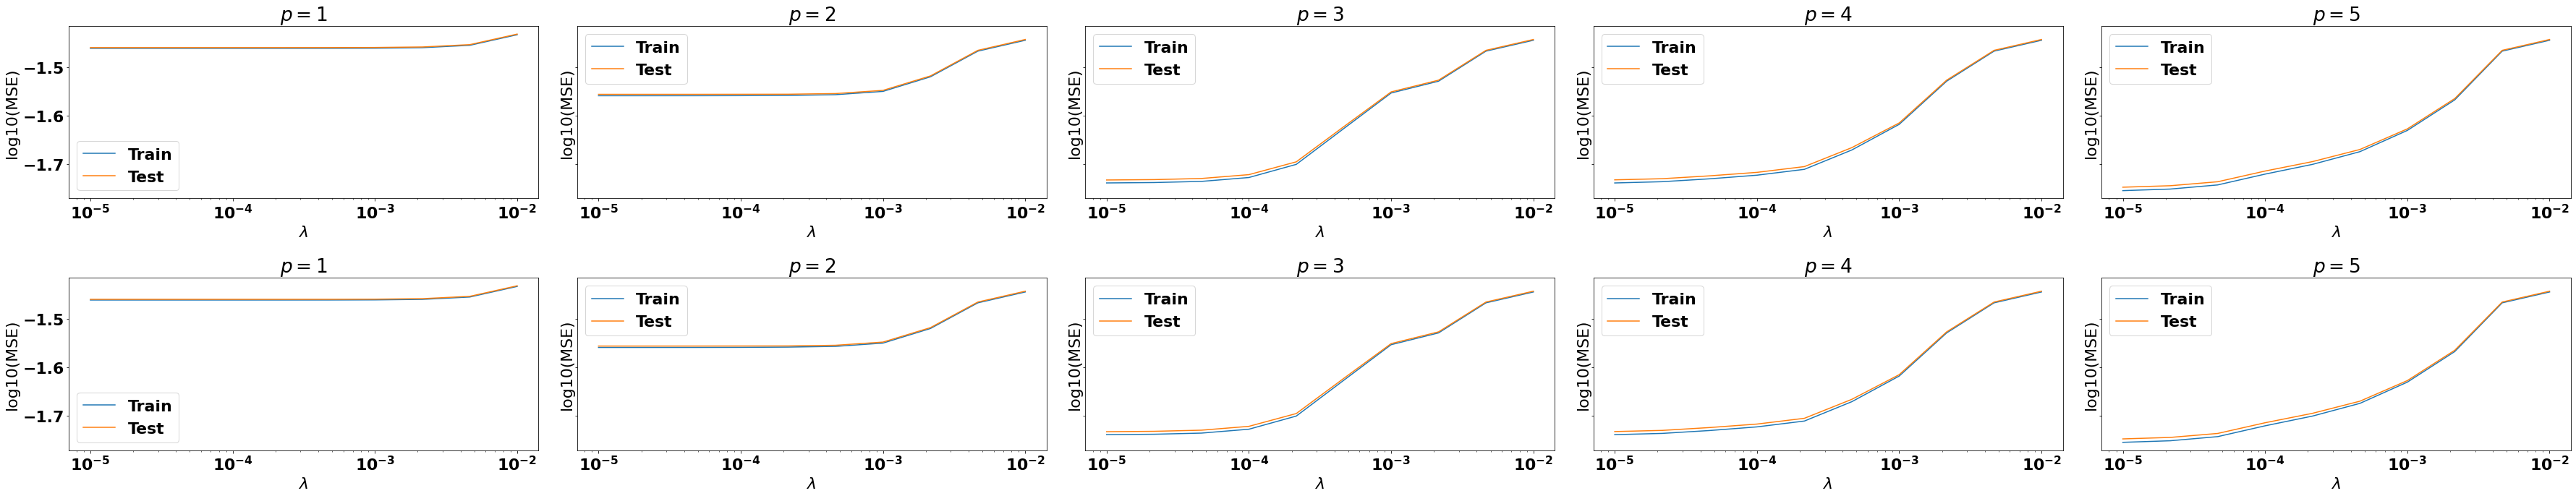

In [343]:
fig, axs = plt.subplots(2,model_complexity//2,figsize=(model_complexity*5,10), sharey=True)
j = 0
for p in range(model_complexity):
    if p >= model_complexity//2:
        j=1
        p -= model_complexity//2
    axs[j,p].set_title("$p=%i$"%(p+1))
    axs[j,p].plot(lambdas, np.log10(mses_train[p]), label="Train")
    axs[j,p].plot(lambdas, np.log10(mses_test[p]), label="Test") 
[ax.set_xscale('log') for ax in axs.ravel()]
[ax.legend() for ax in axs.ravel()]
[ax.set_ylabel("log10(MSE)") for ax in axs.ravel()]
[ax.set_xlabel("$\\lambda$") for ax in axs.ravel()]
fig.tight_layout()

/tmp/ipykernel_4403/3181982819.py:12: RuntimeWarning: divide by zero encountered in log10
  axs[j].plot(ps, np.log10(bias_test[:,i]), label="Bias test", color = 'C2')
/tmp/ipykernel_4403/3181982819.py:13: RuntimeWarning: divide by zero encountered in log10
  axs[j].plot(ps, np.log10(var_test[:,i]), label="Var test", color = 'C3')
/tmp/ipykernel_4403/3181982819.py:12: RuntimeWarning: divide by zero encountered in log10
  axs[j].plot(ps, np.log10(bias_test[:,i]), label="Bias test", color = 'C2')
/tmp/ipykernel_4403/3181982819.py:13: RuntimeWarning: divide by zero encountered in log10
  axs[j].plot(ps, np.log10(var_test[:,i]), label="Var test", color = 'C3')
/tmp/ipykernel_4403/3181982819.py:12: RuntimeWarning: divide by zero encountered in log10
  axs[j].plot(ps, np.log10(bias_test[:,i]), label="Bias test", color = 'C2')
/tmp/ipykernel_4403/3181982819.py:13: RuntimeWarning: divide by zero encountered in log10
  axs[j].plot(ps, np.log10(var_test[:,i]), label="Var test", color = 'C3')
/tmp

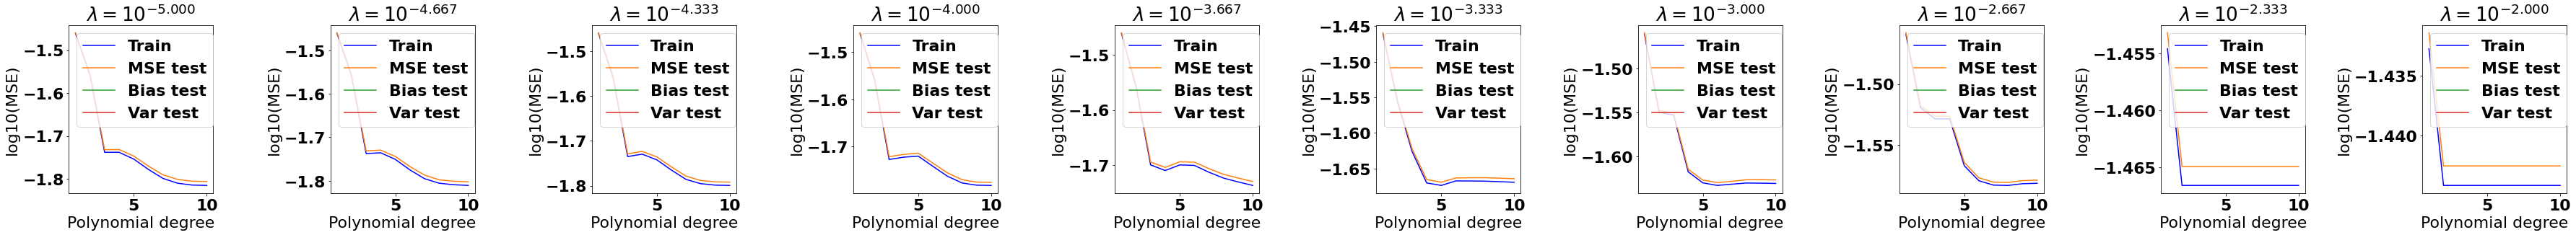

In [344]:
fig, axs = plt.subplots(1,10, figsize=(50,5))#, sharey=True)
ps = np.arange(model_complexity)+1

j = 0
for i in range(len(lambdas)):
    if lambdas[i] == 0:
        axs[j].set_title("$\\lambda = 0$")
    else:
        axs[j].set_title("$\\lambda = 10^{%.3f}$"%np.log10(lambdas[i]))
    axs[j].plot(ps, np.log10(mses_train[:,i]), label="Train", color='b')
    axs[j].plot(ps, np.log10(mses_test[:,i]), label="MSE test", color = 'C1')
    axs[j].plot(ps, np.log10(bias_test[:,i]), label="Bias test", color = 'C2')
    axs[j].plot(ps, np.log10(var_test[:,i]), label="Var test", color = 'C3')
    
    j+=1
[ax.set_ylabel("log10(MSE)") for ax in axs]
[ax.set_xlabel("Polynomial degree") for ax in axs]
[ax.legend() for ax in axs]
fig.tight_layout()

# Real data 
# g)

### plot example

[None, None]

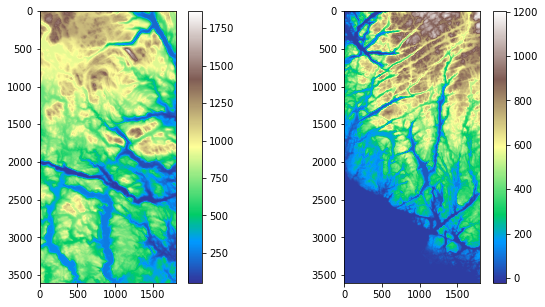

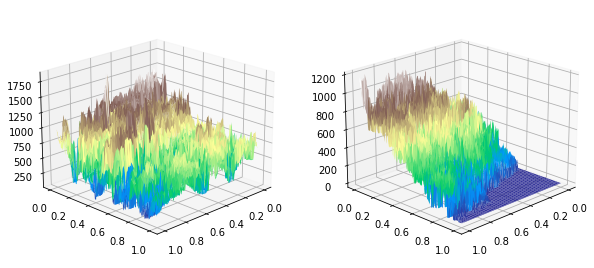

In [144]:
%matplotlib inline
from imageio import imread
datadir = "~/cs/ada_ml/ada_ml_project1/datafiles"
terrain1 = np.array(imread(datadir + "/SRTM_data_Norway_1.tif"))
terrain2 = np.array(imread(datadir + "/SRTM_data_Norway_2.tif"))
fig, axs = plt.subplots(1,2, figsize = (10,5))
fig_3d, axs_3d = plt.subplots(1,2, subplot_kw={'projection':'3d'}, figsize = (10,5))
im1 = axs[0].imshow(terrain1, cmap = plt.cm.terrain)
im2 = axs[1].imshow(terrain2, cmap = plt.cm.terrain)
cbar1 = fig.colorbar(im1, ax = axs[0])
cbar2 = fig.colorbar(im2, ax = axs[1])
x1, y1 = np.meshgrid(np.linspace(0,1, terrain1.shape[1]), np.linspace(0,1, terrain1.shape[0]) )
x2, y2 = np.meshgrid(np.linspace(0,1, terrain2.shape[1]), np.linspace(0,1, terrain2.shape[0]) )
axs_3d[0].plot_surface(x1, y1, terrain1, cmap =plt.cm.terrain)
axs_3d[1].plot_surface(x2, y2, terrain2, cmap =plt.cm.terrain)
[ax.view_init(20,45) for ax in axs_3d]

## Test OLS
- with scaling and centering

In [145]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
p = 10
xvec = np.array([x1,y1])

#X = make_design_matrix(xvec = xvec, p = p)
X = create_X(x = x1, y=y1, n = p)[:,1:]
Xtrain, Xtest, ztrain, ztest = train_test_split(X, terrain1.ravel(), **{'random_state' : 3155, 'test_size' : 0.3})
Xtrain_scaled_centered = (Xtrain - np.mean(Xtrain,axis=0))/np.std(Xtrain,axis=1)
Xtest_scaled_centered = (Xtest - np.mean(Xtrain,axis=0))/np.std(Xtrain,axis=1)
ztilde_train, betahat = ols_fp_wo_split(X=Xtrain_scaled_centered, y=ztrain-np.mean(ztrain))
ztilde_train += np.mean(ztrain)
ztilde_test = Xtest_scaled_centered@betahat + np.mean(ztrain)

ValueError: operands could not be broadcast together with shapes (4539780,65) (4539780,) 

In [ ]:
fig_3d, axs_3d = plt.subplots(1,2, subplot_kw={'projection':'3d'}, figsize = (10,5))
axs_3d[0].scatter(Xtrain[:,0][::100], 
                  Xtrain[:,1][::100], 
                  ztilde_train[::100], 
                  c=ztilde_train[::100], cmap = plt.cm.terrain)
axs_3d[1].scatter(Xtest[:,0][::100], 
                  Xtest[:,1][::100], 
                  ztilde_test[::100], 
                  c = ztilde_test[::100], cmap = plt.cm.terrain)
axs_3d[0].plot_surface(x1, y1, terrain1, cmap =plt.cm.terrain)
axs_3d[1].plot_surface(x1, y1, terrain1, cmap =plt.cm.terrain)
[ax.view_init(20,45) for ax in axs_3d]

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
p = 15
xvec = np.array([x1,y1])

#X = make_design_matrix(xvec = xvec, p = p)
X = create_X(x = x2, y=y2, n = p)[:,1:]
Xtrain, Xtest, ztrain, ztest = train_test_split(X, terrain2.ravel(), **{'random_state' : 3155, 'test_size' : 0.3})
Xtrain_scaled_centered = (Xtrain - np.mean(Xtrain,axis=0))/np.std(Xtrain,axis=0)
Xtest_scaled_centered = (Xtest - np.mean(Xtrain,axis=0))/np.std(Xtrain,axis=0)
ztilde_train, betahat = ols_fp_wo_split(X=Xtrain_scaled_centered, y=ztrain-np.mean(ztrain))
ztilde_train += np.mean(ztrain)
ztilde_test = Xtest_scaled_centered@betahat + np.mean(ztrain)

In [ ]:
fig_3d, axs_3d = plt.subplots(1,2, subplot_kw={'projection':'3d'}, figsize = (10,5))
axs_3d[0].scatter(Xtrain[:,0][::10], 
                  Xtrain[:,1][::10], 
                  ztilde_train[::10], 
                  c=ztilde_train[::10], cmap = plt.cm.terrain)
axs_3d[1].scatter(Xtest[:,0][::10], 
                  Xtest[:,1][::10], 
                  ztilde_test[::10], 
                  c = ztilde_test[::10], cmap = plt.cm.terrain)
axs_3d[0].plot_surface(x2, y2, terrain2, cmap = plt.cm.terrain)
axs_3d[1].plot_surface(x2, y2, terrain2, cmap = plt.cm.terrain)
[ax.view_init(20,45) for ax in axs_3d]

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].set_title("Histogram residuals terrain2 train")
axs[1].set_title("Histogram residuals terrain2 test")

axs[0].hist(ztrain-ztilde_train, bins=30)
axs[1].hist(ztest-ztilde_test, bins=30)


In [ ]:
fig_3d, axs_3d = plt.subplots(1,2, subplot_kw={'projection':'3d'}, figsize = (10,5))
axs_3d[0].scatter(Xtrain[:,0][::10], 
                  Xtrain[:,1][::10], 
                  ztrain[::10]-ztilde_train[::10], 
                  c=ztilde_train[::10], cmap = plt.cm.terrain)
axs_3d[1].scatter(Xtest[:,0][::10], 
                  Xtest[:,1][::10], 
                  ztest[::10]-ztilde_test[::10], 
                  c = ztilde_test[::10], cmap = plt.cm.terrain)
[ax.view_init(20,45) for ax in axs_3d]

## Bias-variance trade-off analysis
1. OLS
2. Ridge
3. Lasso

with bootstrap and cross-validation in order to make a full comparison

### OLS bootstrap

In [160]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 15
B = 100
xvec = np.array([x1,y1])

mses_train_ols, var_train_ols, bias_train_ols = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity)) 
mses_test_ols, var_test_ols, bias_test_ols = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity))
for p in range(1,model_complexity+1):
    print(p)
    #X = make_design_matrix(xvec = xvec, p = p)
    X = create_X(x = x1.ravel()[::10], y=y1.ravel()[::10], n = p)
    Xtrain, Xtest, ztrain, ztest = train_test_split(X, terrain1.ravel()[::10], 
                                                    **{'random_state' : 3155, 'test_size' : 0.2})
    ztilde_train = np.zeros((ztrain.shape[0], B))
    ztilde_test = np.zeros((ztest.shape[0], B))
    for ik in range(B):
        # resample training data
        z_resampled, Xtrain_resampled = resample(data = ztrain, design_matrix = Xtrain)
        # center the data
        Xtrain_resampled_scaled_centered = (Xtrain_resampled - np.mean(Xtrain_resampled, axis=0))
        Xtest_scaled_centered = (Xtest - np.mean(Xtrain_resampled,axis=0))
        ztilde_train[:,ik], betahat = ols_fp_wo_split(X = Xtrain_resampled_scaled_centered, 
                                                      y = z_resampled-np.mean(z_resampled))
        # add mean of the training data
        ztilde_train[:,ik] += np.mean(z_resampled)
        # compute centered prediction and add mean of training data
        ztilde_test[:,ik] = Xtest_scaled_centered@betahat + np.mean(z_resampled)
        
    # compute mse, bias and variance for training and test set
    mses_train_ols[p-1] = np.nanmean(((ztrain[:,np.newaxis] - ztilde_train)**2))
    bias_train_ols[p-1] = np.nanmean((ztrain - np.nanmean(ztilde_train, axis=1))**2)
    var_train_ols[p-1] = np.nanmean(np.var(ztilde_train, axis=1))

    mses_test_ols[p-1] = np.nanmean((ztest[:,np.newaxis] - ztilde_test)**2)
    bias_test_ols[p-1] = np.nanmean((ztest - np.mean(ztilde_test, axis=1))**2)
    var_test_ols[p-1] = np.nanmean(np.var(ztilde_test, axis=1))

1
2
3
4
5
6
7
8


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1,1)
ps = np.arange(model_complexity)+1
ax.set_title("OLS bootstrap estimates $B=N, p\\in[%i,%i]$"%(ps[0], ps[-1]))
ax.plot(ps, np.log10(mses_train_ols), label="MSE Train", ls='--' ) 
ax.plot(ps, np.log10(mses_test_ols), label="MSE Test" ) 
ax.plot(ps, np.log10(bias_test_ols), label="Bias Test",   ls='--', marker = 'x') 
ax.plot(ps, np.log10(var_test_ols),  label="$\\sigma^2$ Test",  marker = '^') 
ax.legend()
ax.set_ylabel("log10(MSE)")
ax.set_xticks(ps, ps)
fig.tight_layout()
fig.savefig(os.getcwd() + "/figs/partG/OLS_bootstrap_k%i_p%i_terrain1_bias_var_tradeoff.png"%(k, ps[-1]), dpi=150)

## For profiling

In [ ]:
%load_ext line_profiler

# CV OLS

### OLS cross validation

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 10
xvec = np.array([x1,y1])
k = 5
splits = kfold(data=terrain1, k=k, random_state = 3155)
mses_train_ols, var_train_ols, bias_train_ols = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity))
mses_test_ols,  var_test_ols,  bias_test_ols = np.zeros((model_complexity)), np.zeros((model_complexity)),np.zeros((model_complexity))
for p in range(1,model_complexity+1):
    print(p)
    ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = terrain1, splits=splits, xvec = xvec,k = k, p = p,method = "ols")
    #computing the metrics
    mses_train_ols[p-1] = np.nanmean((ztrain - ztilde_train)**2)
    bias_train_ols[p-1] = np.nanmean((ztrain - np.nanmean(ztilde_train, axis=1))**2)
    var_train_ols[p-1] = np.nanmean(np.var(ztilde_train, axis=1))

    mses_test_ols[p-1] = np.nanmean((ztest - ztilde_test)**2)
    bias_test_ols[p-1] = np.nanmean((ztest - np.nanmean(ztilde_test, axis=1))**2)
    var_test_ols[p-1] = np.nanmean(np.nanvar(ztilde_test, axis=1))

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5), sharey=True)
ps = np.arange(model_complexity) + 1
ax.plot(ps, np.log10(mses_test_ols), label="MSE Test") 
ax.plot(ps, np.log10(bias_test_ols), label="Bias Test") 
ax.plot(ps, np.log10(var_test_ols), label="Var Test") 
ax.legend()
ax.set_ylabel("log10(MSE)")
fig.savefig(os.getcwd() + "/figs/partG/OLS_cv_k%i_p%i_terrain1_bias_var_tradeoff.png"%(k, ps[-1]), dpi=150)

## Ridge CV

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 10
xvec = np.array([x1,y1])
# generate split indices
k = 5

lambdas = np.logspace(-5,5, 10)
ll = len(lambdas)
mses_train_ridge, var_train_ridge, bias_train_ridge = np.zeros((model_complexity, ll)), np.zeros((model_complexity, ll)),np.zeros((model_complexity,ll))
mses_test_ridge, var_test_ridge, bias_test_ridge = np.zeros((model_complexity,ll)), np.zeros((model_complexity,ll)),np.zeros((model_complexity,ll))
for p in range(1,model_complexity+1):
    print(p)
    for i in range(len(lambdas)):
        print(p, i)
        splits = kfold(data=terrain1, k=k, random_state = 3155)
        
        ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = terrain1, splits=splits, 
                                                                    xvec = xvec,k = k, p = p,
                                                                    method = "ridge", 
                                                                    lmbda = lambdas[i])
        #computing the metrics
        mses_train_ridge[p-1, i] = np.nanmean((ztrain - ztilde_train)**2)
        bias_train_ridge[p-1, i] = np.nanmean((ztrain - np.nanmean(ztilde_train, axis=1, keepdims=True))**2)
        var_train_ridge[p-1, i] = np.nanmean(np.var(ztilde_train, axis=1))

        mses_test_ridge[p-1, i] = np.nanmean((ztest - ztilde_test)**2)
        bias_test_ridge[p-1, i] = np.nanmean((ztest - np.mean(ztilde_test, axis=1, keepdims=True))**2)
        var_test_ridge[p-1, i] = np.nanmean(np.nanvar(ztilde_test, axis=1))

In [ ]:
import os
for i in range(model_complexity):
    fig, ax = plt.subplots(1,1,figsize=(5,5), sharey=True)
    #ax.plot(lambdas, np.log10(mses_train_ridge[i]), ls = '--', label="MSE Train")
    ax.plot(lambdas, np.log10(mses_test_ridge[i]), label="MSE Test") 
    #ax.plot(lambdas, np.log10(bias_train_ridge[i]), ls = '--', label="Bias Train")
    ax.plot(lambdas, np.log10(bias_test_ridge[i]), label="Bias Test") 
    #ax.plot(lambdas, np.log10(var_train_ridge[i]), ls = '--', label="Var Train")
    ax.plot(lambdas, np.log10(var_test_ridge[i]), label="Var Test") 
    ax.set_xscale('log')
    ax.legend()
    ax.set_ylabel("log10(MSE)")
    ax.set_ylim(4,5.5)
    fig.savefig(os.getcwd() + "/figs/partG/ridge_cv_k%i_p%i_terrain1.png"%(k,i), dpi=150)

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,5), sharey=True)
ps = np.arange(model_complexity) + 1
carr = np.arange(len(lambdas))/len(lambdas)
cs_train = plt.cm.copper(carr)
cs_test = plt.cm.cool(carr)
for i in range(len(lambdas)):
    ax.plot(ps, np.log10(mses_train_ridge[:,i]), 
            ls = '--', color = cs_train[i],
            label="Train $\\lambda = 10^{%.2f}$"%np.log10(lambdas[i]))
    ax.plot(ps, np.log10(mses_test_ridge[:,i]), color = cs_test[i],
            label="Test $\\lambda = 10^{%.2f}$"%np.log10(lambdas[i])) 
ax.legend(bbox_to_anchor=(1,.5,.2,.6))
fig.savefig(os.getcwd() + "/figs/partG/ridge_cv_k%i_p10_terrain1.png"%(k), dpi=150)

# Lasso CV

In [ ]:
import importlib; import project1; importlib.reload(project1); from project1.project1 import *
model_complexity = 5
xvec = np.array([x1,y1])
k = 5
splits = kfold(data=terrain1, k=k, random_state = 3155)
mses_train_lasso, var_train_lasso, bias_train_lasso = np.zeros((model_complexity,ll)), np.zeros((model_complexity,ll)),np.zeros((model_complexity,ll))
mses_test_lasso, var_test_lasso, bias_test_lasso = np.zeros((model_complexity, ll)), np.zeros((model_complexity,ll)),np.zeros((model_complexity,ll))
for p in range(1,model_complexity+1):
    print(p)
    for i in range(len(lambdas)):
        print(p, i)
        ztrain, ztest, ztilde_train, ztilde_test = cross_validation(data = terrain1, 
                                                                    splits = splits, 
                                                                    xvec = xvec, 
                                                                    k = k, p = p, 
                                                                    method = "lasso", 
                                                                    lmbda = lambdas[i])
        #computing the metrics
        mses_train_lasso[p-1, i] = np.nanmean((ztrain - ztilde_train)**2)
        bias_train_lasso[p-1, i] = np.nanmean((ztrain - np.nanmean(ztilde_train, axis=1, keepdims=True))**2)
        var_train_lasso[p-1, i] = np.nanmean(np.var(ztilde_train, axis=1))

        mses_test_lasso[p-1, i] = np.nanmean((ztest - ztilde_test)**2)
        bias_test_lasso[p-1, i] = np.nanmean((ztest - np.nanmean(ztilde_test, axis=1, keepdims=True))**2)
        var_test_lasso[p-1, i] = np.nanmean(np.nanvar(ztilde_test, axis=1))

In [ ]:
fig, axs = plt.subplots(1,ll//2, figsize=(ll//2*5,5))

ps = np.arange(model_complexity)+1

for i in range(len(lambdas)//2):
    if lambdas[i] == 0:
        axs[i].set_title("$\\lambda = 0$")
    else:    
        axs[i].set_title("$\\lambda = 10^{%.3f}$"%np.log10(lambdas[i]))
    axs[i].plot(ps, np.log10(mses_train_lasso[:,i*2]),  label="MSE train", color = 'b')
    axs[i].plot(ps, np.log10(mses_test_lasso[:,i*2]),  label="MSE test",  color = 'b', ls='--')
    axs[i].plot(ps, np.log10(bias_train_lasso[:,i*2]),  label="Bias train",color = 'C1')
    axs[i].plot(ps, np.log10(bias_test_lasso[:,i*2]),  label="Bias test", color = 'C1', ls='--')
    axs[i].plot(ps, np.log10(var_train_lasso[:,i*2]),  label="Var train", color = 'C2')
    axs[i].plot(ps, np.log10(var_test_lasso[:,i*2]),  label="Var test",  color = 'C2', ls='--')
[ax.set_ylabel("log10(MSE)") for ax in axs]
[ax.set_xlabel("Polynomial degree") for ax in axs]
[ax.legend() for ax in axs]
fig.tight_layout()
fig.savefig(os.getcwd() + "/figs/partG/lasso_cv_k%i_p%i_terrain1.png"%(k, ps[-1]), dpi=150)

In [ ]:
for i in range(5):
    fig, ax = plt.subplots(1,1,figsize=(5,5), sharey=True)
    ax.set_title("$p = %i$"%(i+1))
    #ax.plot(lambdas, np.log10(mses_train_lasso[i]), ls = '--', label="MSE Train")
    ax.plot(lambdas, np.log10(mses_test_lasso[i]), label="MSE Test") 
    #ax.plot(lambdas, np.log10(bias_train_lasso[i]), ls = '--', label="Bias Train")
    ax.plot(lambdas, np.log10(bias_test_lasso[i]), label="Bias Test") 
    #ax.plot(lambdas, np.log10(var_train_lasso[i]), ls = '--', label="Var Train")
    ax.plot(lambdas, np.log10(var_test_lasso[i]), label="Var Test") 
    ax.set_xscale('log')
    ax.legend()
    ax.set_ylabel("log10(MSE)")
    #ax.set_ylim(4,5.5)
    fig.savefig(os.getcwd() + "/figs/partG/lasso_cv_k%i_p%i_terrain1_bias_var_tradeoff.png"%(k, i), dpi=150)    